In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Importing Telecom Data

In [2]:
telecom_df = pd.read_csv('data/telecom_churn_data.csv')



In [3]:
telecom_df.info()
telecom_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
round(100*(telecom_df.isnull().sum()/len(telecom_df.index)), 2)


mobile_number     0.00
circle_id         0.00
loc_og_t2o_mou    1.02
std_og_t2o_mou    1.02
loc_ic_t2o_mou    1.02
                  ... 
aon               0.00
aug_vbc_3g        0.00
jul_vbc_3g        0.00
jun_vbc_3g        0.00
sep_vbc_3g        0.00
Length: 226, dtype: float64

## Data Preparation

Scoping our sample to the High valued customer (top 30%) who demonstrated high spending in the initial two months.
Churn Indicator created based on the provided business logics

In [5]:
# create Churn data

telecom_df1 = telecom_df
telecom_df1['total_rech_amt_good_phase'] = (telecom_df1['total_rech_amt_6'] + telecom_df1['total_rech_amt_7'])/2
telecom_df1 = telecom_df1[telecom_df1['total_rech_amt_good_phase'] > telecom_df1['total_rech_amt_good_phase'].quantile(0.70)]

telecom_df1['total_usage_col'] = telecom_df1['total_og_mou_9'] + telecom_df1['total_ic_mou_9'] + telecom_df1['vol_2g_mb_9'] + telecom_df1['vol_3g_mb_9']

telecom_df1['churn'] = np.where(telecom_df1['total_usage_col']== 0, 1, 0)
telecom_df1['churn'].value_counts()

<ipython-input-5-dbffb6f1fc26>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telecom_df1['total_usage_col'] = telecom_df1['total_og_mou_9'] + telecom_df1['total_ic_mou_9'] + telecom_df1['vol_2g_mb_9'] + telecom_df1['vol_3g_mb_9']
<ipython-input-5-dbffb6f1fc26>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telecom_df1['churn'] = np.where(telecom_df1['total_usage_col']== 0, 1, 0)


0    27390
1     2589
Name: churn, dtype: int64

In [6]:
telecom_df1 = telecom_df1.drop(['total_rech_amt_good_phase','total_usage_col'],1)


As per the analysis scope dropping all the variables of the 9th month after the churn indicator creation

In [7]:
nine_col = [col for col in telecom_df1.columns if '_9' in col]
print(telecom_df1.shape)
telecom_df1 = telecom_df1.drop(nine_col, axis = 1)
print(telecom_df1.shape)
telecom_df1 = telecom_df1.drop('sep_vbc_3g', axis=1)

(29979, 227)
(29979, 173)


## Churn rate-

In [8]:
y = telecom_df1['churn']
churn = (sum(y)/len(y.index))*100
print(churn)
print(telecom_df1.shape)

## Churn rate is 8.63.

8.636045231662164
(29979, 172)


In [9]:
telecom_df1.describe()


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
count,2.997900e+04,29979.0,29865.0,29865.0,29865.0,29979.000000,29979.000000,29979.000000,29663.000000,29676.000000,...,29979.000000,29979.000000,11387.000000,11652.000000,11741.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000
mean,7.001223e+09,109.0,0.0,0.0,0.0,587.587624,589.424681,535.067748,299.392147,307.701888,...,0.150339,0.140498,0.897603,0.889804,0.837322,1264.158911,129.482436,135.225368,121.450911,0.08636
std,6.846594e+05,0.0,0.0,0.0,0.0,442.848876,463.049067,492.447887,462.369385,483.432401,...,0.969779,0.975212,0.303184,0.313147,0.369087,975.181038,390.625027,408.218570,389.910814,0.28090
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.00000
25%,7.000641e+09,109.0,0.0,0.0,0.0,364.352500,365.235000,289.782000,43.030000,42.775000,...,0.000000,0.000000,1.000000,1.000000,1.000000,480.000000,0.000000,0.000000,0.000000,0.00000
50%,7.001232e+09,109.0,0.0,0.0,0.0,495.951000,493.781000,452.232000,128.480000,128.120000,...,0.000000,0.000000,1.000000,1.000000,1.000000,914.000000,0.000000,0.000000,0.000000,0.00000
75%,7.001814e+09,109.0,0.0,0.0,0.0,704.184500,700.986000,671.349500,357.655000,365.127500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1923.500000,1.600000,2.025000,0.000000,0.00000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,35.000000,41.000000,1.000000,1.000000,1.000000,4321.000000,12916.220000,9165.600000,11166.210000,1.00000


In [10]:
# Check null percentages of each attribute
round(100*(telecom_df1.isnull().sum()/len(telecom_df1.index)), 2)


mobile_number     0.00
circle_id         0.00
loc_og_t2o_mou    0.38
std_og_t2o_mou    0.38
loc_ic_t2o_mou    0.38
                  ... 
aon               0.00
aug_vbc_3g        0.00
jul_vbc_3g        0.00
jun_vbc_3g        0.00
churn             0.00
Length: 172, dtype: float64

## Dropping colums with only one unique value (showing zero variance)

In [11]:
#delete coloum as all value are zero or constant
telecom_df2 = telecom_df1.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6',
                     'std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7',
                   'std_ic_t2o_mou_8','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'], 1)

In [12]:
#Droping colume
fields_to_be_imputed_with_2 = ['fb_user','night_pck_user','arpu_2g','arpu_3g','av_rech_amt_data','count_rech_3g',
'count_rech_2g','max_rech_data','total_rech_data','date_of_last_rech_data']

for field in fields_to_be_imputed_with_2:
    for month in ['6', '7', '8']:
        field_to_be_imputed_with_2 = field + '_' + month
        telecom_df2 = telecom_df2.drop([field_to_be_imputed_with_2], 1)
        
print(telecom_df2.shape)

(29979, 129)


In [13]:
fields_to_be_imputed_with_2 = ['date_of_last_rech']

for field in fields_to_be_imputed_with_2:
    for month in ['6', '7', '8']:
        field_to_be_imputed_with_2 = field + '_' + month
        telecom_df2[field_to_be_imputed_with_2].fillna(telecom_df2[field_to_be_imputed_with_2].mode()[0], inplace=True)

In [14]:
telecom_df2['date_of_last_rech_6'] = pd.to_datetime(telecom_df2.date_of_last_rech_6).dt.day
telecom_df2['date_of_last_rech_7'] = pd.to_datetime(telecom_df2.date_of_last_rech_7).dt.day
telecom_df2['date_of_last_rech_8'] = pd.to_datetime(telecom_df2.date_of_last_rech_8).dt.day

## Imputing missing observations with Median column value

In [15]:
missing_cols = telecom_df2.columns[telecom_df2.isnull().sum()>0]
for col in missing_cols:
    telecom_df2[col].fillna((telecom_df2[col].median()), inplace=True)

In [16]:
round(100*(telecom_df2.isnull().sum()/len(telecom_df2.index)), 2)


mobile_number    0.0
arpu_6           0.0
arpu_7           0.0
arpu_8           0.0
onnet_mou_6      0.0
                ... 
aon              0.0
aug_vbc_3g       0.0
jul_vbc_3g       0.0
jun_vbc_3g       0.0
churn            0.0
Length: 129, dtype: float64

In [17]:
telecom_df3 = telecom_df2
telecom_df3.shape

(29979, 129)

## Outlier Treatment

In [18]:
telecom_df3.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])


,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
count,2.997900e+04,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,...,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000
mean,7.001223e+09,587.587624,589.424681,535.067748,297.590611,305.886840,271.137938,421.142281,426.990330,383.029940,...,0.185296,0.173321,0.138063,0.150339,0.140498,1264.158911,129.482436,135.225368,121.450911,0.08636
std,6.846594e+05,442.848876,463.049067,492.447887,460.257092,481.318377,465.205131,468.998414,485.030117,473.464516,...,0.620703,0.583178,0.875984,0.969779,0.975212,975.181038,390.625027,408.218570,389.910814,0.28090
min,7.000000e+09,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.00000
1%,7.000028e+09,18.221200,25.600600,0.000000,0.000000,0.000000,0.000000,1.057800,1.099000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,189.000000,0.000000,0.000000,0.000000,0.00000
10%,7.000269e+09,270.692200,274.458200,134.118600,12.230000,11.726000,6.906000,58.606000,59.604000,35.072000,...,0.000000,0.000000,0.000000,0.000000,0.000000,294.000000,0.000000,0.000000,0.000000,0.00000
25%,7.000641e+09,364.352500,365.235000,289.782000,43.590000,43.370000,34.060000,142.860000,141.280000,111.780000,...,0.000000,0.000000,0.000000,0.000000,0.000000,480.000000,0.000000,0.000000,0.000000,0.00000
50%,7.001232e+09,495.951000,493.781000,452.232000,128.480000,128.120000,106.390000,285.990000,285.630000,251.530000,...,0.000000,0.000000,0.000000,0.000000,0.000000,914.000000,0.000000,0.000000,0.000000,0.00000
75%,7.001814e+09,704.184500,700.986000,671.349500,353.500000,360.360000,298.215000,523.625000,532.905000,483.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1923.500000,1.600000,2.025000,0.000000,0.00000
90%,7.002167e+09,994.311800,996.051400,985.499200,795.354000,825.486000,724.182000,916.490000,935.716000,854.006000,...,1.000000,1.000000,0.000000,0.000000,0.000000,2846.000000,439.100000,455.078000,395.168000,0.00000


In [19]:
cont_cols = [col for col in telecom_df3.columns if col not in ['churn','mobile_number']]

for col in cont_cols:
    percentiles = telecom_df3[col].quantile([0.01,0.99]).values
    telecom_df3[col][telecom_df3[col] <= percentiles[0]] = percentiles[0]
    telecom_df3[col][telecom_df3[col] >= percentiles[1]] = percentiles[1]

<ipython-input-19-62aba0c28ebc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telecom_df3[col][telecom_df3[col] <= percentiles[0]] = percentiles[0]
<ipython-input-19-62aba0c28ebc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telecom_df3[col][telecom_df3[col] >= percentiles[1]] = percentiles[1]
<ipython-input-19-62aba0c28ebc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telecom_df3[col][telecom_df3[col] <= percentiles[0]] = p

<ipython-input-19-62aba0c28ebc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telecom_df3[col][telecom_df3[col] >= percentiles[1]] = percentiles[1]
<ipython-input-19-62aba0c28ebc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telecom_df3[col][telecom_df3[col] <= percentiles[0]] = percentiles[0]
<ipython-input-19-62aba0c28ebc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telecom_df3[col][telecom_df3[col] >= percentiles[1]] = p

<ipython-input-19-62aba0c28ebc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telecom_df3[col][telecom_df3[col] >= percentiles[1]] = percentiles[1]
<ipython-input-19-62aba0c28ebc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telecom_df3[col][telecom_df3[col] <= percentiles[0]] = percentiles[0]
<ipython-input-19-62aba0c28ebc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telecom_df3[col][telecom_df3[col] >= percentiles[1]] = p

<ipython-input-19-62aba0c28ebc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telecom_df3[col][telecom_df3[col] <= percentiles[0]] = percentiles[0]
<ipython-input-19-62aba0c28ebc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telecom_df3[col][telecom_df3[col] <= percentiles[0]] = percentiles[0]
<ipython-input-19-62aba0c28ebc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telecom_df3[col][telecom_df3[col] <= percentiles[0]] = p

In [20]:
telecom_df3.shape


(29979, 129)

In [21]:
telecom_df3.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])


,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
count,2.997900e+04,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,...,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000
mean,7.001223e+09,578.115790,579.934200,524.618925,288.909740,296.580898,261.866393,413.363109,418.408660,373.082685,...,0.173288,0.163815,0.100304,0.103239,0.093966,1263.461223,120.468609,126.130999,112.271333,0.08636
std,6.846594e+05,336.036348,338.202040,370.788082,404.375323,419.262037,398.634242,420.037947,429.176148,401.058913,...,0.520151,0.505309,0.427528,0.442786,0.431060,973.137375,318.585454,337.364761,313.189126,0.28090
min,7.000000e+09,18.221200,25.600600,0.000000,0.000000,0.000000,0.000000,1.057800,1.099000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,189.000000,0.000000,0.000000,0.000000,0.00000
1%,7.000028e+09,18.228064,25.732732,0.000000,0.000000,0.000000,0.000000,1.059516,1.107580,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,189.000000,0.000000,0.000000,0.000000,0.00000
10%,7.000269e+09,270.692200,274.458200,134.118600,12.230000,11.726000,6.906000,58.606000,59.604000,35.072000,...,0.000000,0.000000,0.000000,0.000000,0.000000,294.000000,0.000000,0.000000,0.000000,0.00000
25%,7.000641e+09,364.352500,365.235000,289.782000,43.590000,43.370000,34.060000,142.860000,141.280000,111.780000,...,0.000000,0.000000,0.000000,0.000000,0.000000,480.000000,0.000000,0.000000,0.000000,0.00000
50%,7.001232e+09,495.951000,493.781000,452.232000,128.480000,128.120000,106.390000,285.990000,285.630000,251.530000,...,0.000000,0.000000,0.000000,0.000000,0.000000,914.000000,0.000000,0.000000,0.000000,0.00000
75%,7.001814e+09,704.184500,700.986000,671.349500,353.500000,360.360000,298.215000,523.625000,532.905000,483.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1923.500000,1.600000,2.025000,0.000000,0.00000
90%,7.002167e+09,994.311800,996.051400,985.499200,795.354000,825.486000,724.182000,916.490000,935.716000,854.006000,...,1.000000,1.000000,0.000000,0.000000,0.000000,2846.000000,439.100000,455.078000,395.168000,0.00000


## Creating derived colums

Average values of 3 months for each attributes were created to check if that value could address all the months.
Median value of Internet usage (2G + 3G) across months was created to capture the churn rate as it was observed majority of the churn happens when the internet usage pattern shows a decline
The AON variable was used to create tenure buckets. It was observed larger the tenure, lesser was the churn - as customers who are newly acquired to the network churned more as compared to the old customers.

In [22]:
# month_cols =  ['arpu','onnet_mou','offnet_mou','roam_ic_mou','roam_og_mou','loc_og_t2t_mou','loc_og_t2m_mou','loc_og_t2f_mou',
# 'loc_og_t2c_mou','loc_og_mou','std_og_t2t_mou','std_og_t2m_mou','std_og_t2f_mou','std_og_mou','isd_og_mou',
# 'spl_og_mou','og_others','total_og_mou','loc_ic_t2t_mou','loc_ic_t2m_mou','loc_ic_t2f_mou','loc_ic_mou',
# 'std_ic_t2t_mou','std_ic_t2m_mou','std_ic_t2f_mou','std_ic_mou','total_ic_mou','spl_ic_mou','isd_ic_mou',
# 'ic_others','total_rech_num','total_rech_amt','max_rech_amt','last_day_rch_amt','vol_2g_mb','vol_3g_mb',
# 'monthly_2g','sachet_2g','monthly_3g','sachet_3g']

# month_val = ['6','7','8']
# s = []


# for col in month_cols:

#     col_var_list = [col + "_" + x for x in month_val]
#     avg_val_col = col + "_avg"    
#     s.append(avg_val_col)
#     telecom_df3[avg_val_col] = telecom_df3[col_var_list].mean(axis=1)


# telecom_df3.reset_index(drop=True, inplace=True)

telecom_df3['int_usage_median'] = telecom_df3[['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8']].median(axis=1)
telecom_df3['int_usage_median'] = telecom_df3.int_usage_median.map(lambda x: 1 if x == 0 else 0)
telecom_df3 = telecom_df3.drop(['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'], 1)


telecom_df3['tenure_buck'] = np.round(telecom_df3['aon']/365,1)
bins = [0, 1, 2, 3, 4, 10]
telecom_df3['tenure_buck'] = pd.cut(telecom_df3['tenure_buck'], bins)
telecom_df3['tenure_buck'].value_counts()

(4, 10]    9681
(1, 2]     7486
(0, 1]     5320
(2, 3]     4530
(3, 4]     2962
Name: tenure_buck, dtype: int64

## Correlation Analysis

In [23]:
# Create correlation matrix
corr_matrix = telecom_df3.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop

telecom_df3 = telecom_df3.drop(to_drop, 1)

<ipython-input-23-58b109cfe589>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [24]:
telecom_df3.tenure_buck.dtype


CategoricalDtype(categories=[(0, 1], (1, 2], (2, 3], (3, 4], (4, 10]],
, ordered=True)

In [25]:
#create dummy for tenure_buck 
telecom_df3 = pd.get_dummies(telecom_df3, drop_first=True)

In [26]:
telecom_df3.rename(columns={"tenure_buck_(1, 2]": "tenure_buck_1_to_2","tenure_buck_(2, 3]":"tenure_buck_2_to_3",
                   "tenure_buck_(3, 4]":"tenure_buck_3_to_4",
                   "tenure_buck_(4, 10]":"tenure_buck_4_to_10"}, inplace=True)

In [27]:
telecom_df3.shape


(29979, 72)

In [28]:
# After outlier treatment droping column which don't have much variance or zero variance
telecom_df4 = telecom_df3.drop(['og_others_7','og_others_8','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','aon'], 1)

In [29]:
telecom_df4.shape


(29979, 66)

## Exploratory data analysis

<ipython-input-30-eb92556d5a0e>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5, 5))


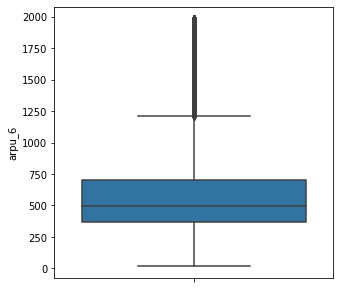

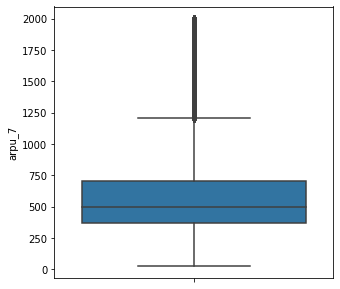

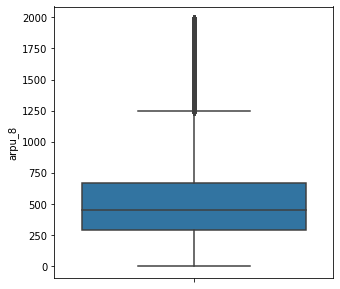

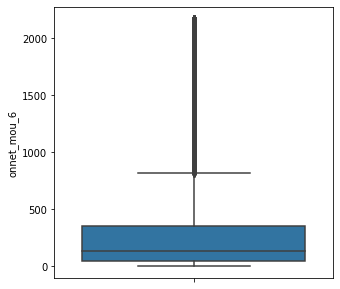

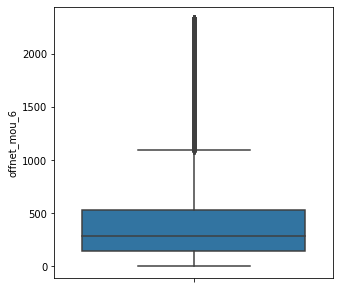

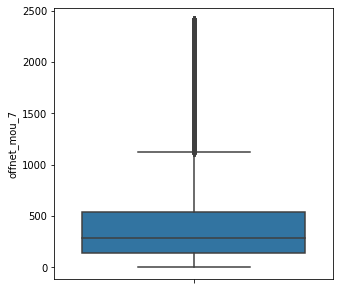

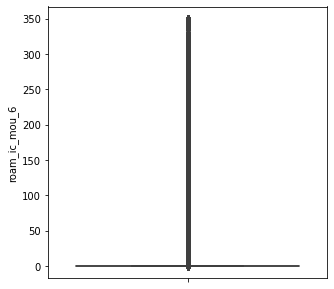

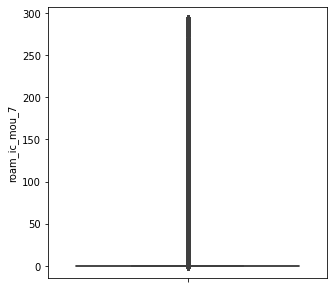

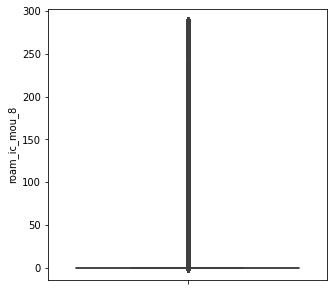

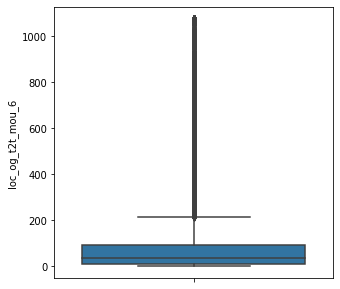

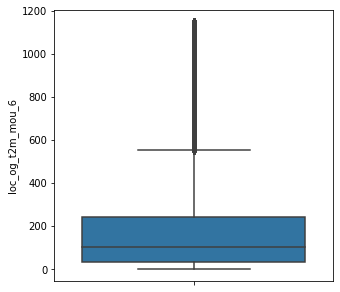

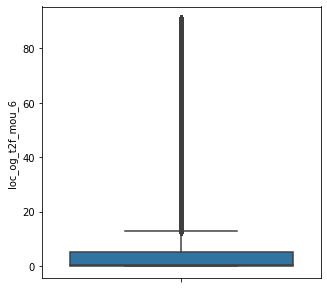

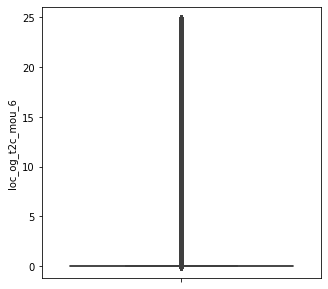

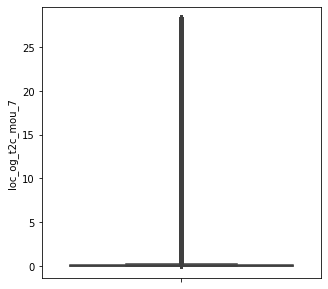

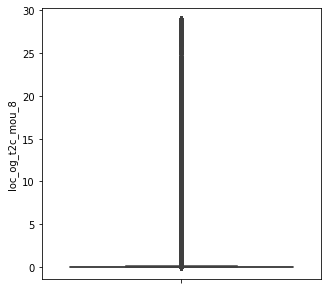

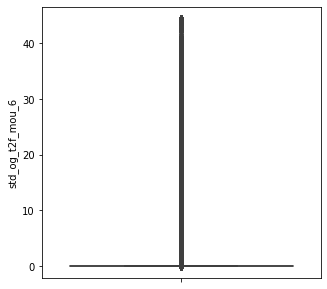

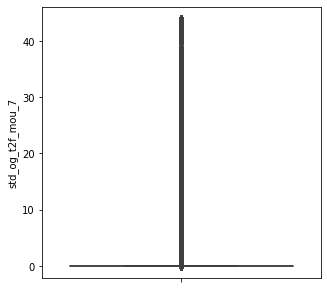

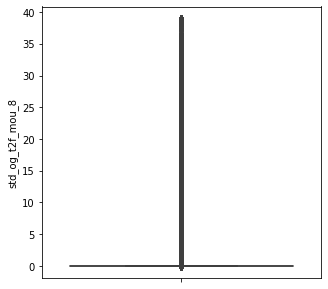

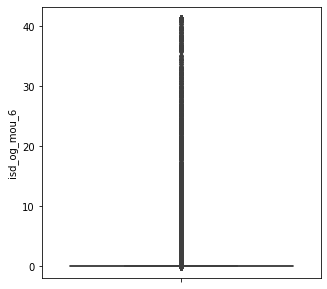

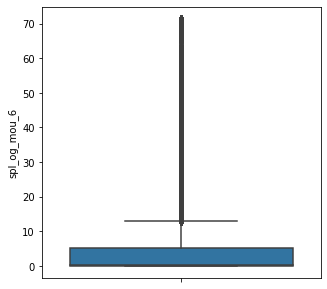

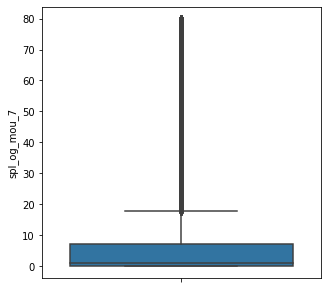

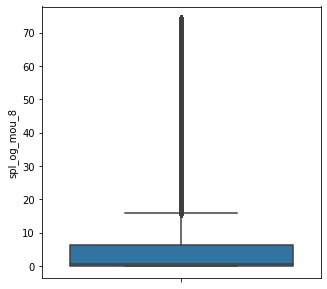

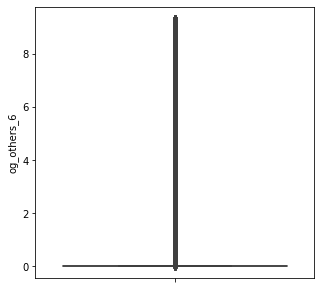

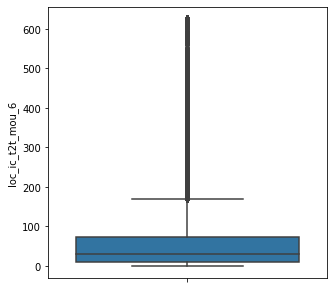

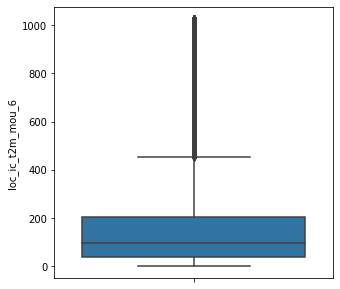

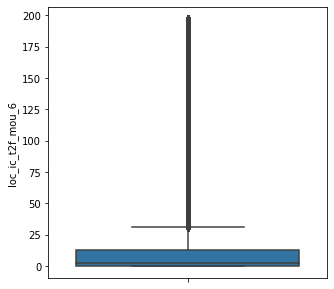

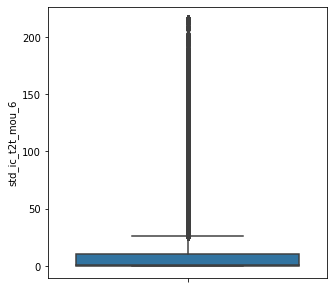

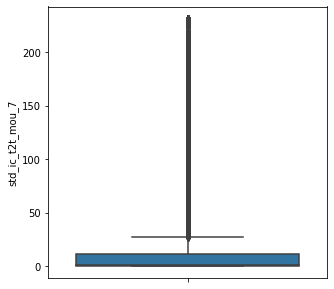

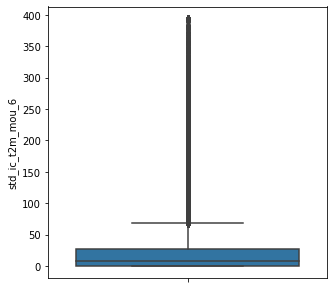

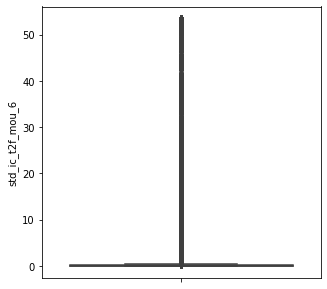

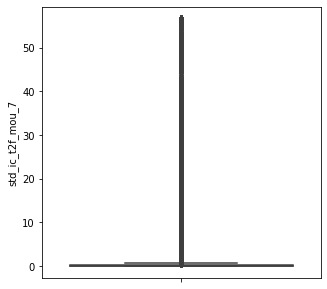

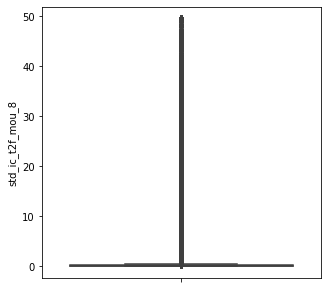

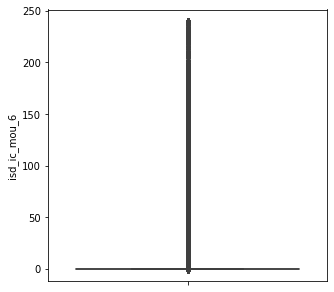

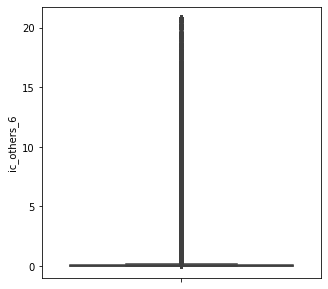

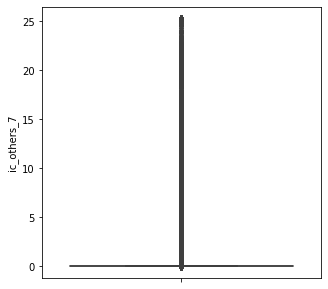

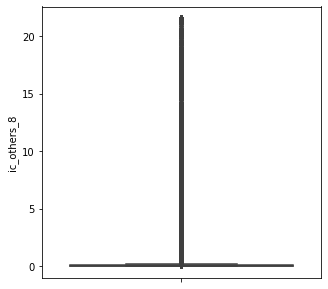

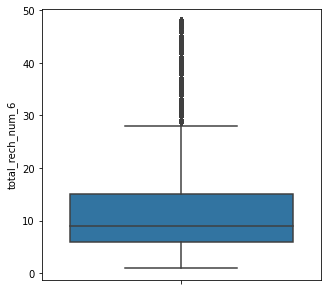

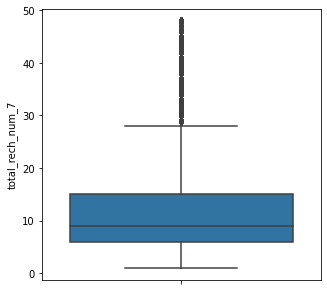

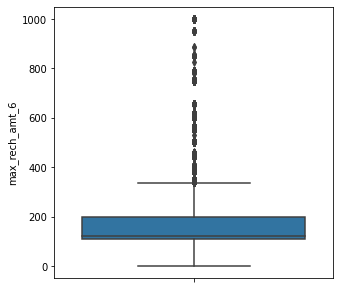

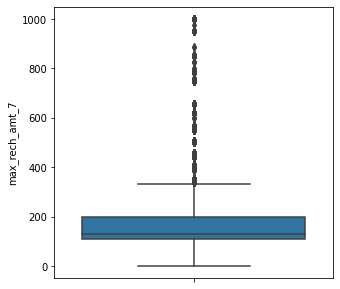

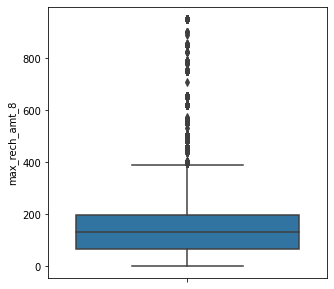

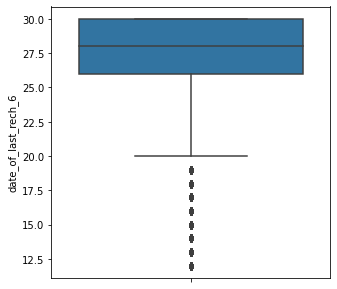

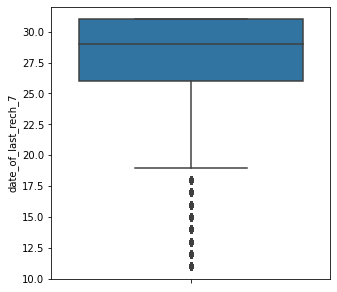

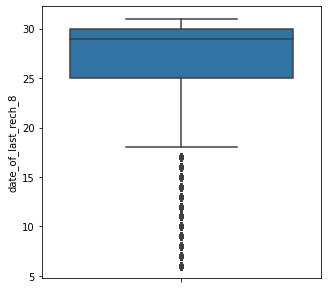

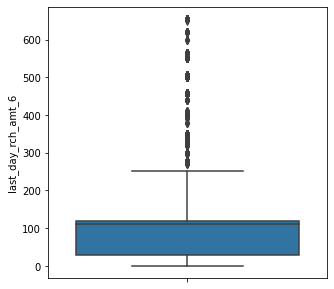

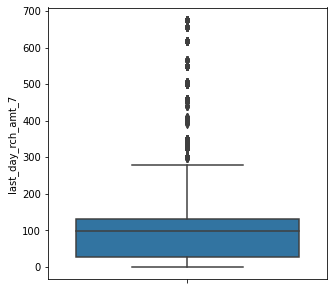

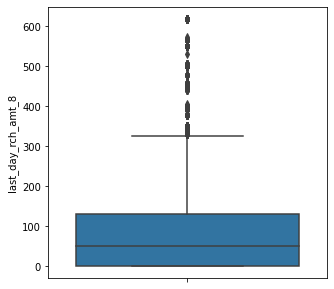

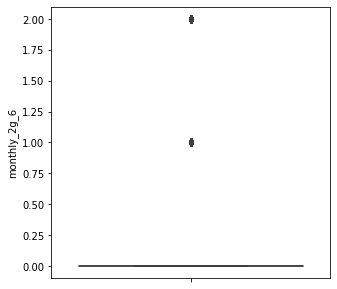

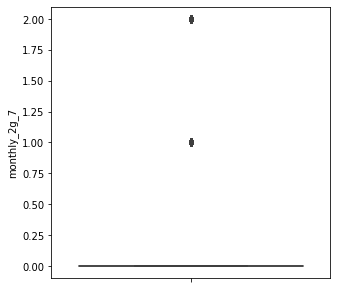

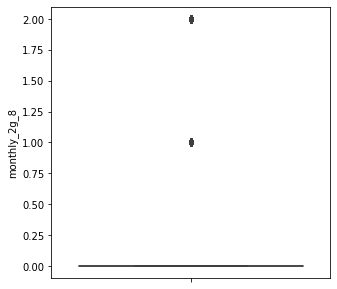

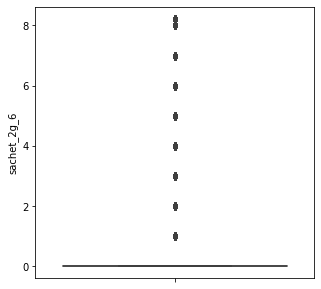

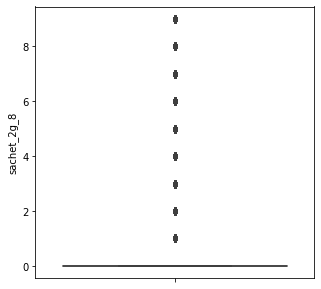

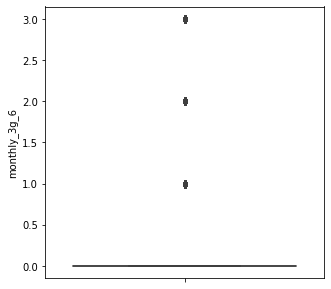

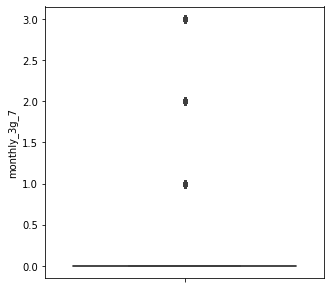

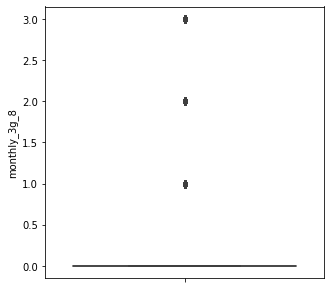

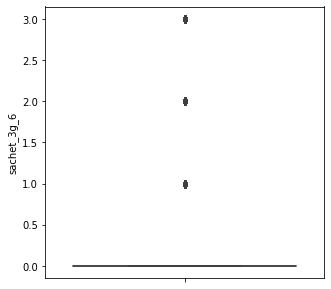

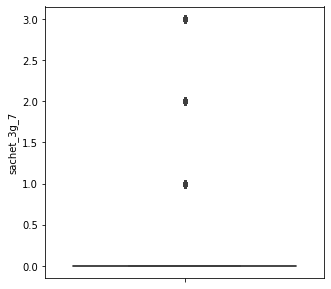

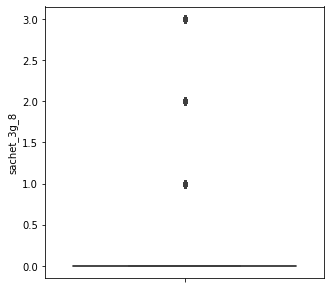

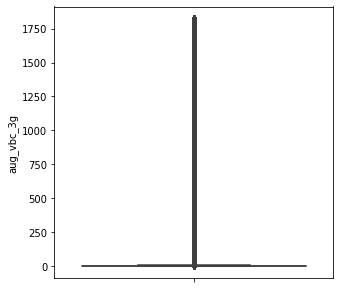

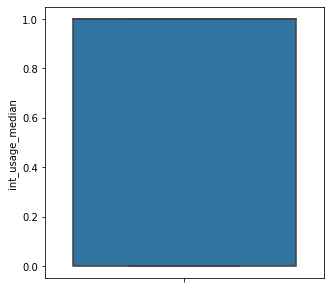

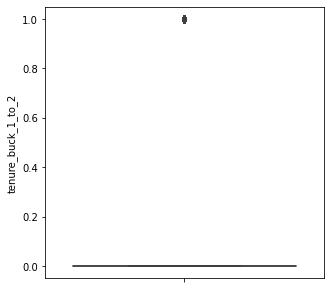

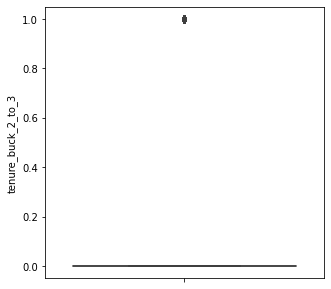

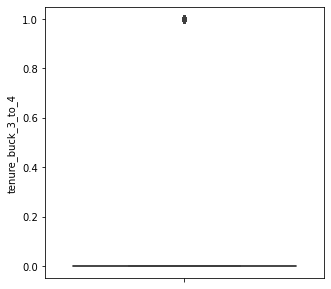

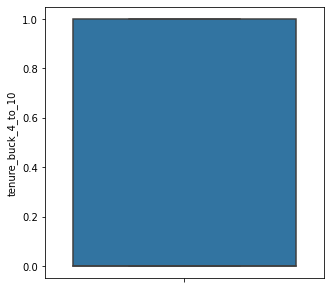

In [30]:
# Univariate analysis of each attribute

# from scipy.stats import norm
# plt.figure(figsize=(5, 5))
# sns.boxplot(y='arpu_6', data=telecom_df3)
cont_cols = [col for col in telecom_df4.columns if col not in ['churn','mobile_number']]
for col in cont_cols:
    plt.figure(figsize=(5, 5))
    sns.boxplot(y=col, data=telecom_df4)

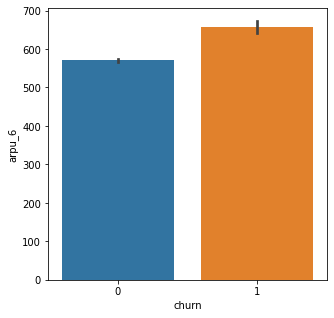

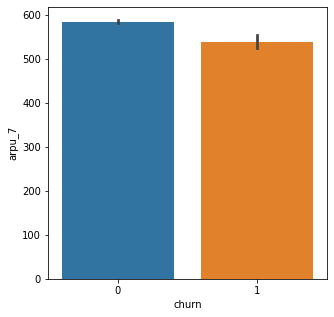

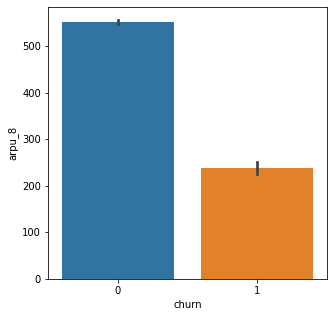

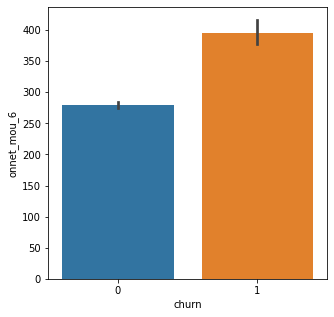

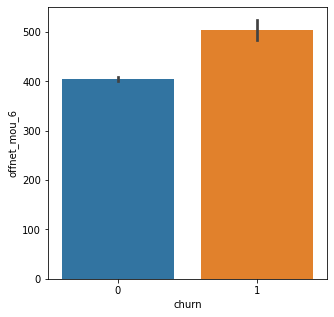

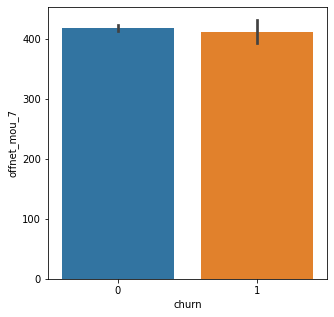

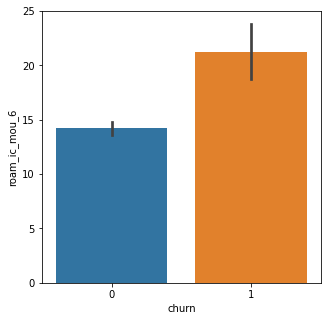

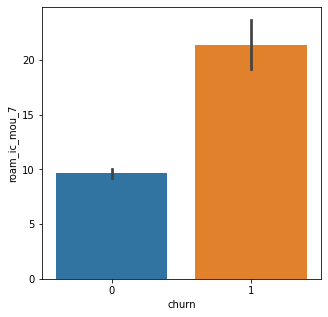

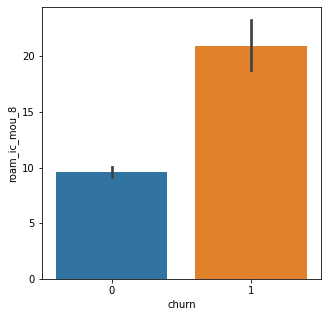

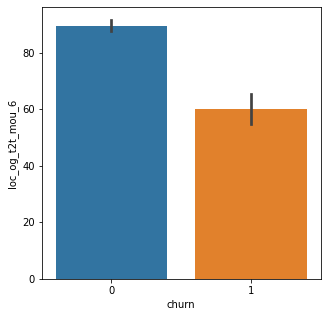

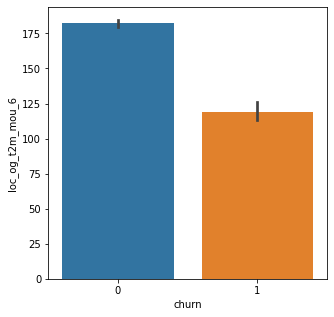

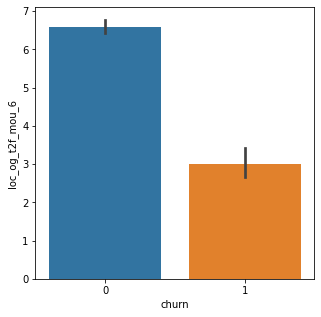

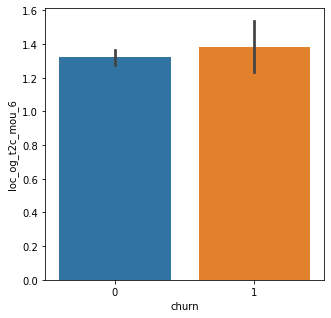

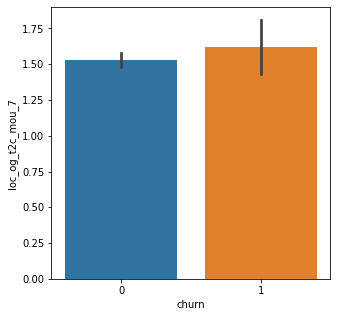

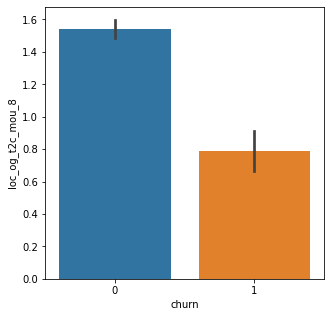

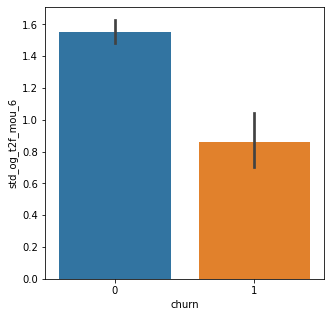

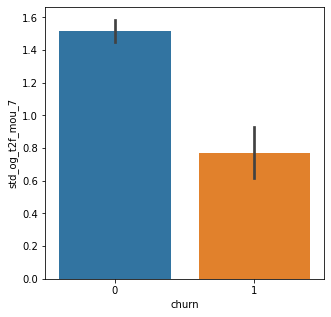

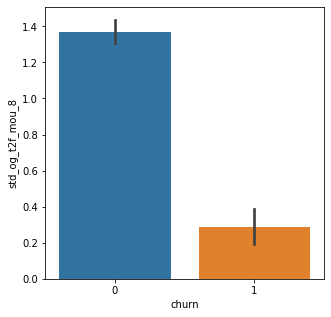

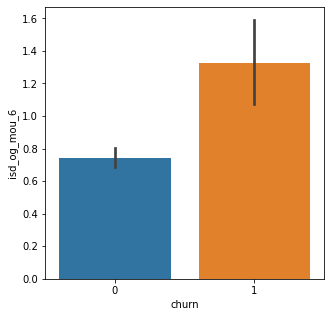

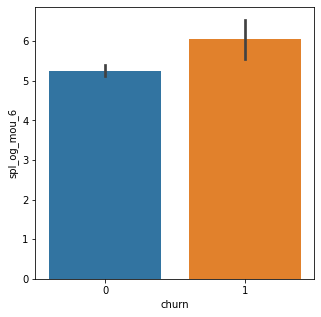

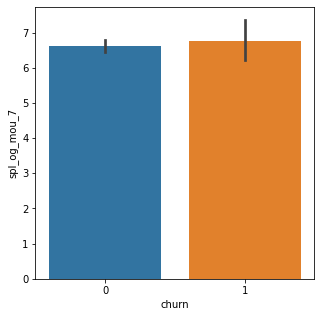

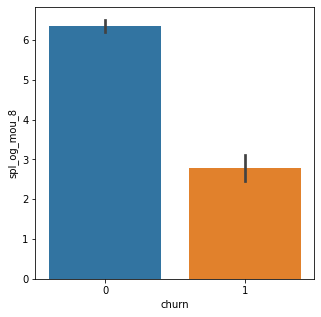

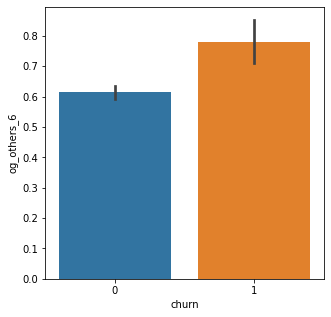

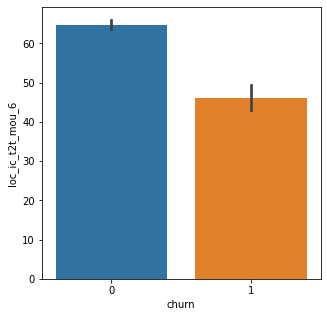

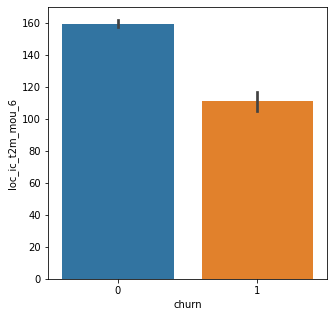

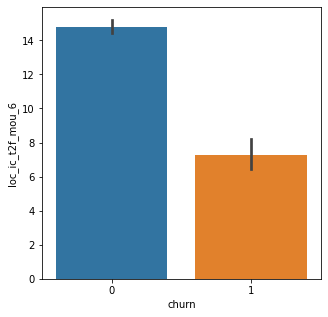

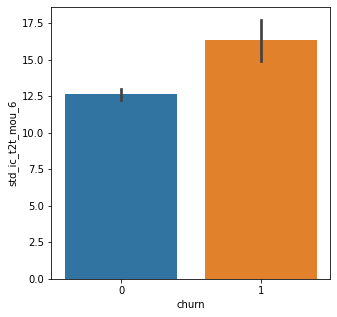

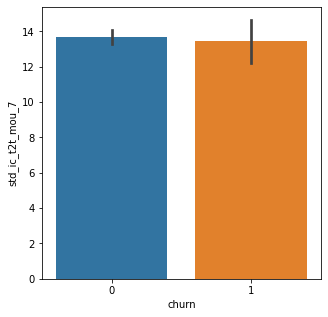

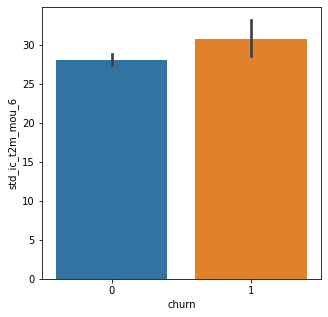

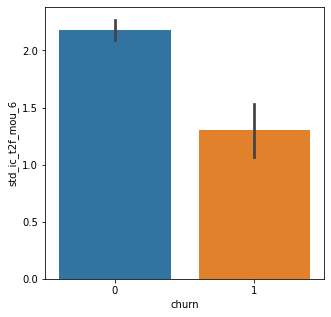

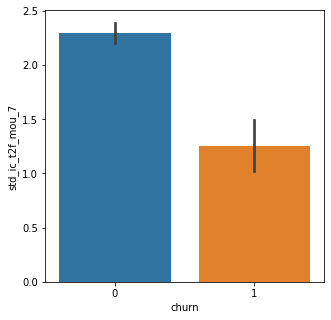

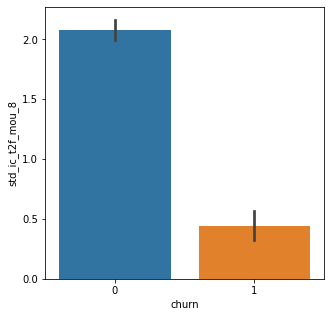

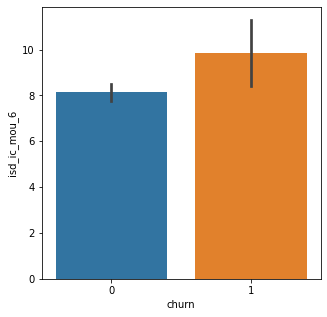

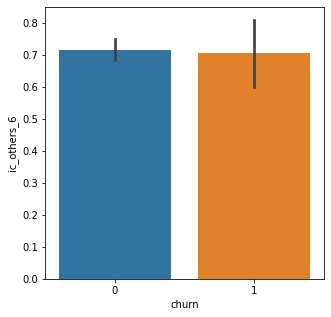

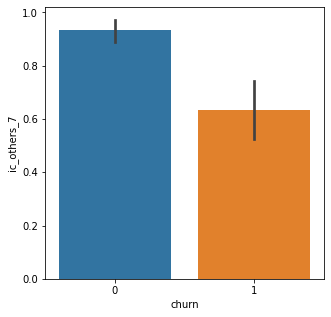

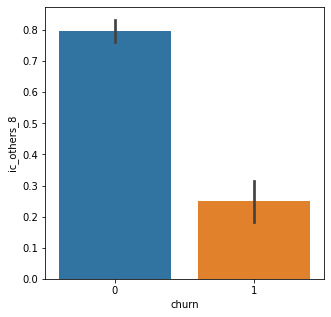

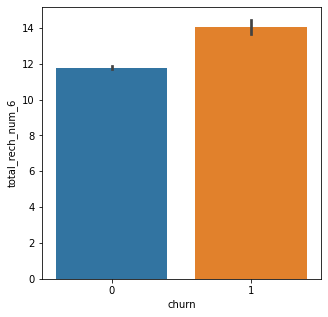

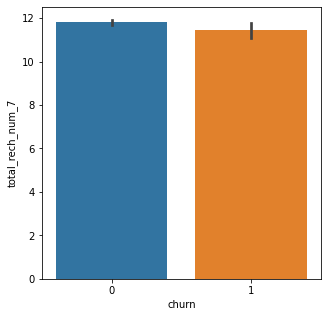

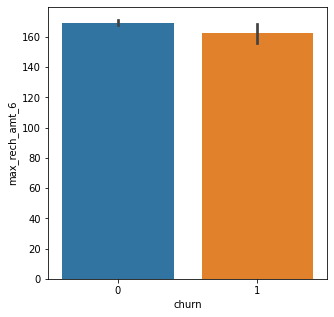

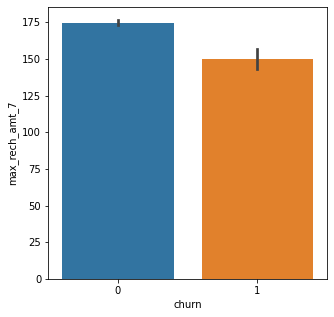

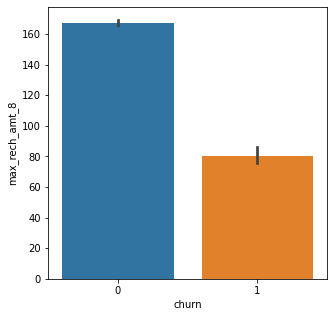

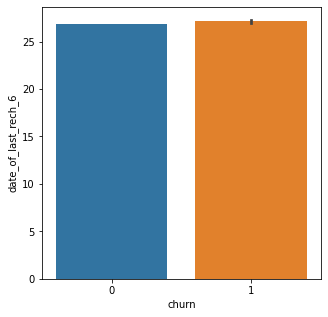

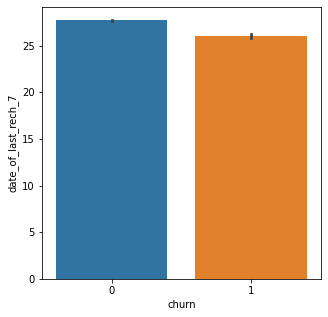

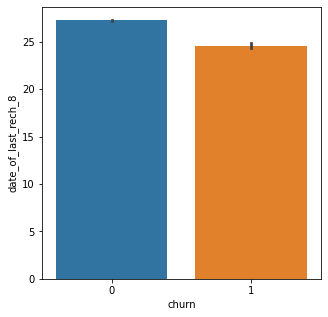

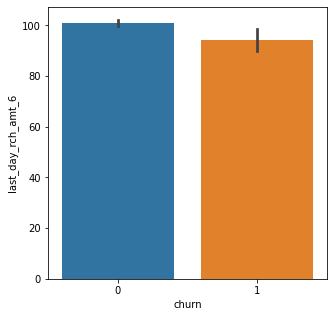

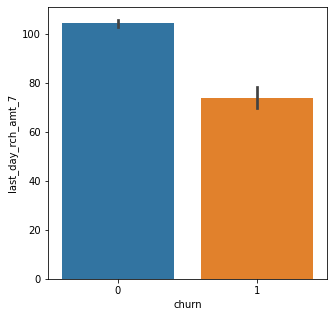

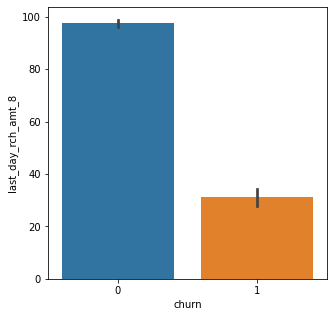

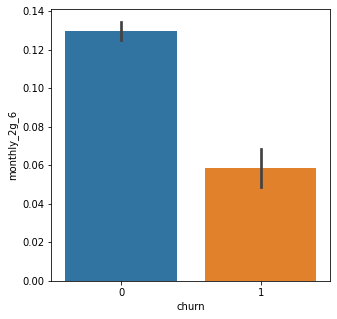

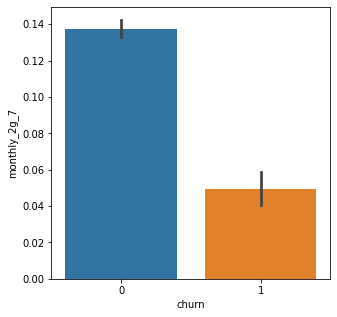

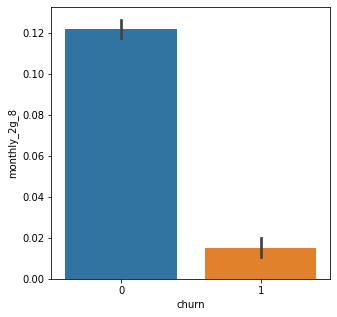

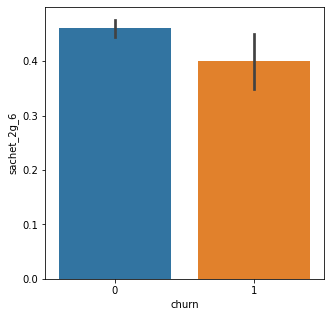

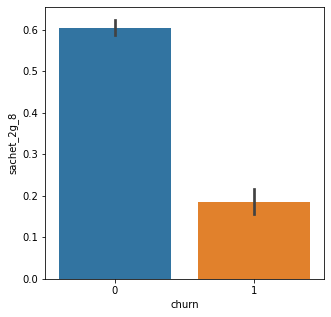

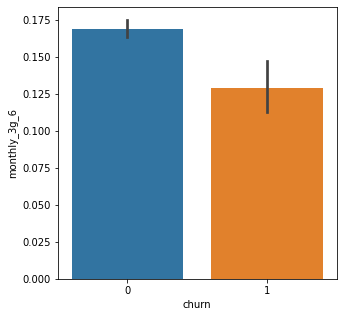

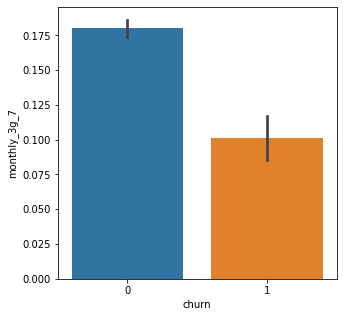

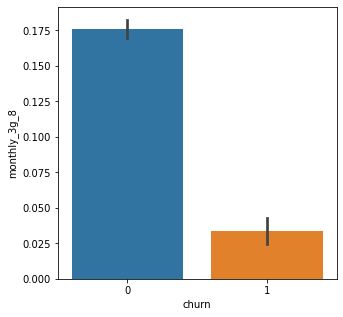

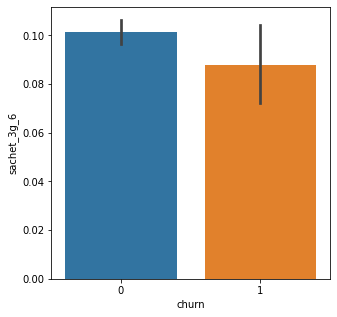

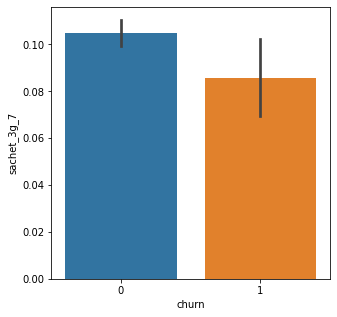

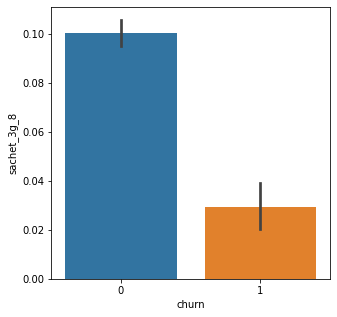

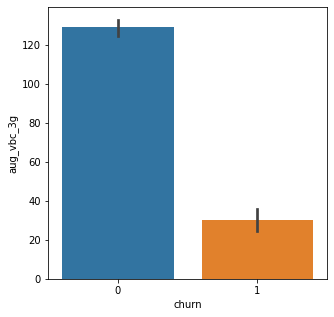

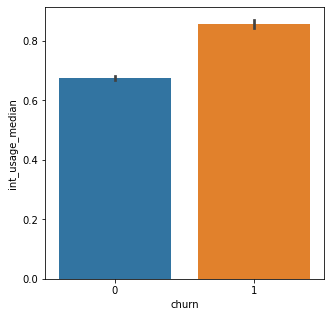

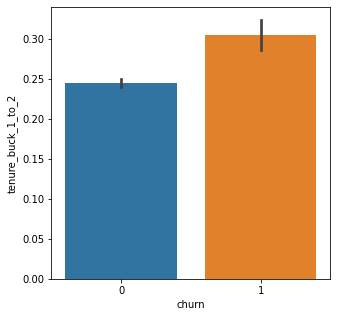

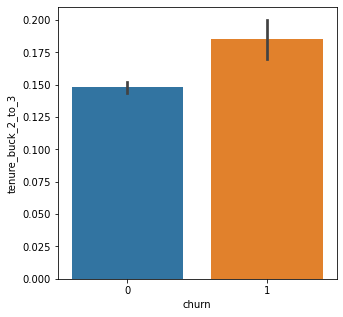

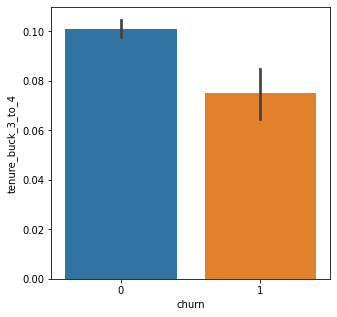

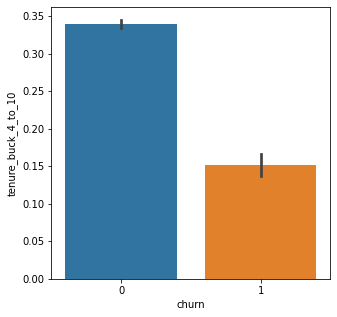

In [31]:
# Analyse each attribute w.r.t churn

cont_cols = [col for col in telecom_df4.columns if col not in ['churn','mobile_number']]
for col in cont_cols:
    plt.figure(figsize=(5, 5))
    sns.barplot(x='churn', y=col, data=telecom_df4)
    plt.show()

[Text(0, 0.5, '(%)')]

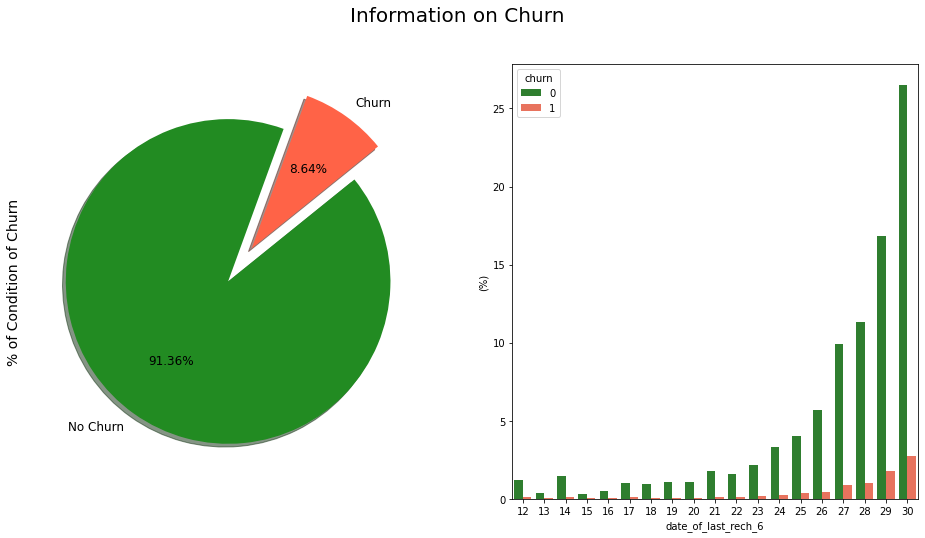

In [32]:
f, ax = plt.subplots(1,2, figsize=(16,8))
colors = ["#228B22", "#FF6347"]

labels ="No Churn", "Churn"
plt.suptitle('Information on Churn', fontsize=20)

telecom_df4["churn"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)
ax[0].set_ylabel('% of Condition of Churn', fontsize=14)

palette = ["#228B22", "#FF6347"]
sns.barplot(x="date_of_last_rech_6", y="churn", hue="churn", data=telecom_df4, palette=palette, estimator=lambda x: len(x) / len(telecom_df4) * 100)
ax[1].set(ylabel="(%)")

<AxesSubplot:xlabel='date_of_last_rech_8', ylabel='churn'>

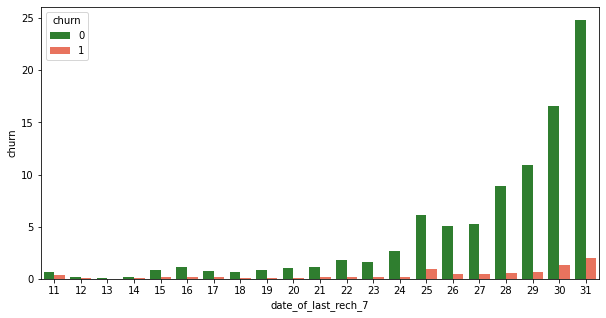

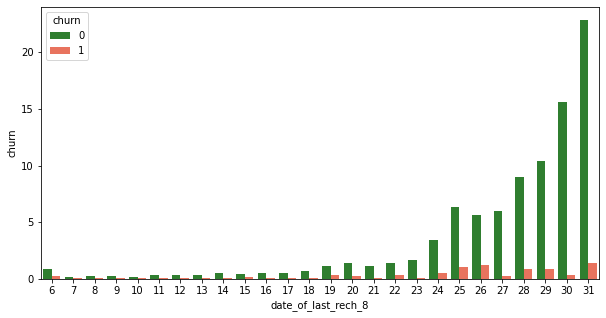

In [33]:
plt.figure(figsize=(10,5))
palette = ["#228B22", "#FF6347"]
sns.barplot(x="date_of_last_rech_7", y="churn", hue="churn", data=telecom_df4, palette=palette, 
            estimator=lambda x: len(x) / len(telecom_df4) * 100)

plt.figure(figsize=(10,5))
palette = ["#228B22", "#FF6347"]
sns.barplot(x="date_of_last_rech_8", y="churn", hue="churn", data=telecom_df4, palette=palette, 
            estimator=lambda x: len(x) / len(telecom_df4) * 100)

In [34]:
telecom_df4.shape


(29979, 66)

In [35]:
# # Let's see the correlation matrix 
# plt.figure(figsize = (100,100))        # Size of the figure
# sns.heatmap(telecom_df4.corr(),annot = True)
telecom_df5 = telecom_df4
telecom_df5.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,churn,int_usage_median,tenure_buck_1_to_2,tenure_buck_2_to_3,tenure_buck_3_to_4,tenure_buck_4_to_10
7,7000701601,1069.180,1349.8500,1988.08226,57.84,453.43,567.160,16.23,33.49,31.64,...,0,0,0,57.74,1,1,0,1,0,0
8,7001524846,378.721,492.2230,137.36200,413.69,94.66,80.630,0.00,0.00,0.00,...,0,0,0,21.03,0,0,0,0,0,0
13,7002191713,492.846,205.6710,593.26000,501.76,413.31,119.280,23.53,144.24,72.11,...,0,0,0,0.00,0,1,0,0,0,1
16,7000875565,430.975,299.8690,187.89400,50.51,296.29,229.740,0.00,2.83,0.00,...,0,0,0,0.00,0,1,1,0,0,0
17,7000187447,690.008,25.6006,25.49900,1185.91,61.64,1.099,0.00,4.76,4.81,...,0,0,0,0.00,0,1,1,0,0,0


## Model Building

### Splitting Data into Training and Test Sets

In [36]:
from sklearn.model_selection import train_test_split
# Putting feature variable to X
X = telecom_df5.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = telecom_df5['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,test_size=0.2,random_state=100)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (23983, 64)
Number transactions y_train dataset:  (23983,)
Number transactions X_test dataset:  (5996, 64)
Number transactions y_test dataset:  (5996,)


In [37]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler()
X_train = norm.fit_transform(X_train)
X_test = norm.transform(X_test)

# defining a normalisation function 
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                                                                          
# applying normalize ( ) to all columns 
X_norm = X.apply(normalize) 
X_norm.head()

X_train = pd.DataFrame(X_train, columns=X.columns.to_list())
X_test = pd.DataFrame(X_test, columns=X.columns.to_list())

In [38]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 2032
Before OverSampling, counts of label '0': 21951 



In [39]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_test==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_test==0)))

Before OverSampling, counts of label '1': 557
Before OverSampling, counts of label '0': 5439 



## PCA

### Seems There is a class imbalance in curn event rate

#### We can add class_weight = 'balanced'
#### Lets do PCA

In [40]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [41]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

In [42]:
print(pca.components_)
colnames = list(X.columns)
# pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
# pcs_df.head(10)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 
                       'PC3':pca.components_[2],'PC4':pca.components_[3],
                       'PC5':pca.components_[4],'PC6':pca.components_[5],
                       'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'PC10':pca.components_[9],
                       'Feature':colnames})
pcs_df.head(10)

[[ 2.75233106e-02  2.92027232e-02  5.55232548e-02 ... -1.10233159e-01
  -3.78292355e-02  6.42047605e-01]
 [ 4.00169409e-02  5.79292789e-02  6.28131888e-02 ...  2.54309408e-02
   2.32998504e-02 -4.05866970e-01]
 [ 8.03744071e-03  8.34908172e-03  3.41827574e-03 ...  6.42958222e-01
   1.68100199e-01 -2.96791719e-01]
 ...
 [-2.70989758e-01 -3.75143399e-01  2.93716170e-01 ...  4.45859358e-03
   7.59900283e-03  6.63614136e-03]
 [ 3.81547337e-02  2.02551220e-01 -4.89809947e-02 ...  4.29653603e-03
   3.15948221e-04  5.80039981e-04]
 [-5.87634498e-01  4.26269505e-01  8.75790935e-03 ... -3.55116978e-04
   3.36986563e-03  3.71919136e-03]]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Feature
0,0.027523,0.040017,0.008037,-0.086946,0.325981,0.033179,-0.016770,-0.083469,-0.016887,-0.149153,arpu_6
1,0.029203,0.057929,0.008349,-0.083620,0.336197,0.029733,0.085907,-0.081107,-0.168239,0.120030,arpu_7
2,0.055523,0.062813,0.003418,-0.071979,0.342117,0.032226,0.093539,-0.085066,-0.180359,0.185968,arpu_8
3,-0.063826,-0.033988,0.016907,-0.081190,0.109299,0.012058,0.067321,-0.001429,-0.052127,-0.089577,onnet_mou_6
4,-0.031090,-0.036741,-0.002202,-0.095282,0.295923,0.021670,-0.154944,-0.072045,-0.044301,-0.145685,offnet_mou_6
5,-0.035370,-0.030119,-0.001728,-0.089831,0.288756,0.021238,-0.074761,-0.061189,-0.157047,0.047133,offnet_mou_7
6,0.006771,-0.002487,0.000081,0.027120,0.041389,0.005000,0.061781,-0.036009,-0.072956,0.136755,roam_ic_mou_6
7,0.004990,-0.000980,0.001567,0.028644,0.046398,0.004434,0.042193,-0.037233,-0.049786,0.110526,roam_ic_mou_7
8,0.006797,0.003801,0.000657,0.018065,0.059405,0.002465,0.033023,-0.033685,-0.049793,0.110737,roam_ic_mou_8
9,0.030763,-0.012285,-0.001810,-0.044083,0.094046,0.008870,-0.083066,-0.015882,0.074884,-0.172895,loc_og_t2t_mou_6


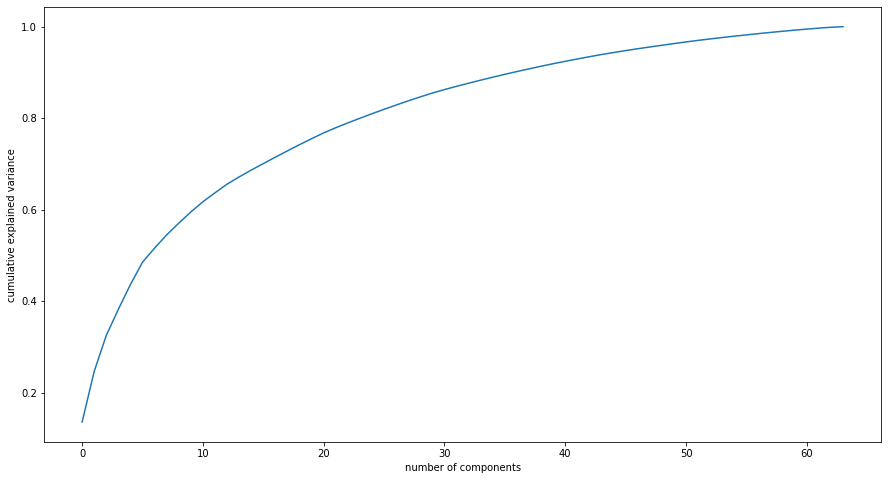

In [43]:
%matplotlib inline
fig = plt.figure(figsize = (15,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

##### As we can see 40 component explain 90% of variance in the data

In [44]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=40)

df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(23983, 40)

## Correlation matrix

In [45]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

<AxesSubplot:>

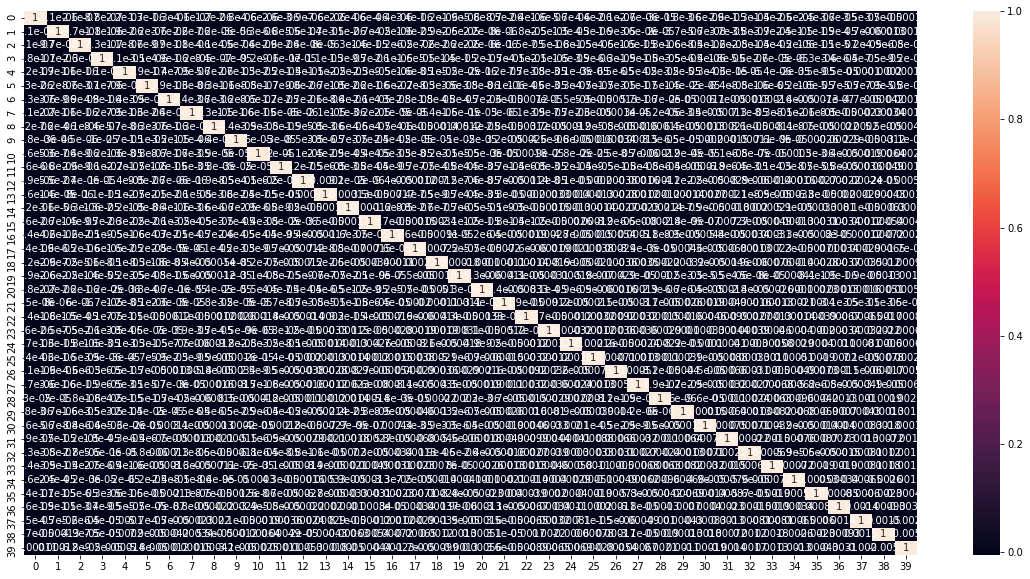

In [46]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [47]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.0022513392254871318 , min corr:  -0.005003998259751024


In [48]:
#Applying selected components to the test data - 20 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(5996, 40)

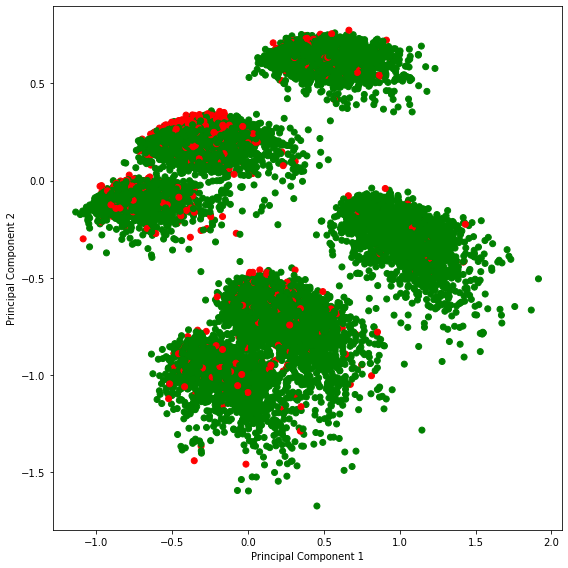

In [49]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

### LogisticRegression model with PCA
#### Now lets do the modeling with selected 40 pca feature
#### We also needs to do the class imbalance with class_width = balanced

In [50]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression(class_weight='balanced')
model_pca = learner_pca.fit(df_train_pca,y_train)

Making prediction on the test data

In [51]:
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.86'

In [52]:
#Making prediction on the test data
pred_test = model_pca.predict_proba(df_test_pca)
y_pred_default = model_pca.predict(df_test_pca)

In [53]:
# print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[4424 1015]
 [ 117  440]]
0.8112074716477652


In [54]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

In [55]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC score: ',roc_auc)

ROC_AUC score:  0.8574798738943393


### ROC Curve

In [56]:
#ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

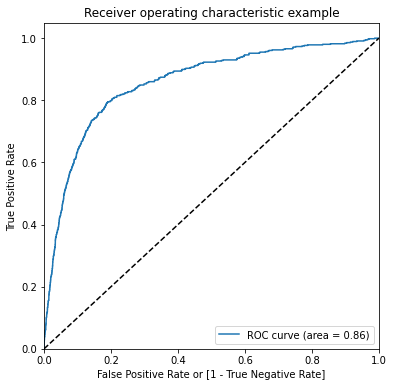

(array([0.        , 0.        , 0.        , ..., 0.99963229, 0.99981614,
        1.        ]),
 array([0.        , 0.00179533, 0.00359066, ..., 1.        , 1.        ,
        1.        ]),
 array([1.99668394e+00, 9.96683939e-01, 9.94959703e-01, ...,
        2.41261620e-04, 2.34231641e-04, 1.32536683e-04]))

In [57]:
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)


In [58]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.081342,1,0,0,0,0,0,0,0,0,0
1,0,0.219767,1,1,1,0,0,0,0,0,0,0
2,0,0.131439,1,1,0,0,0,0,0,0,0,0
3,0,0.394930,1,1,1,1,0,0,0,0,0,0
4,0,0.478236,1,1,1,1,1,0,0,0,0,0


Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

In [59]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.092895  0.000000  1.000000
0.1   0.1  0.310874  0.243059  0.973070
0.2   0.2  0.487825  0.442545  0.929982
0.3   0.3  0.620747  0.592756  0.894075
0.4   0.4  0.730987  0.719250  0.845601
0.5   0.5  0.811207  0.813385  0.789946
0.6   0.6  0.859406  0.876448  0.692998
0.7   0.7  0.886424  0.917816  0.579892
0.8   0.8  0.904103  0.953116  0.425494
0.9   0.9  0.909606  0.981614  0.206463


<AxesSubplot:xlabel='prob'>

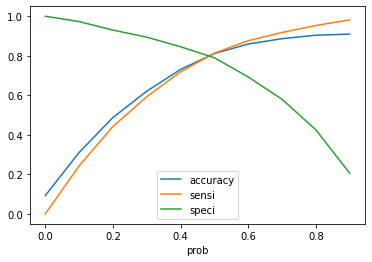

In [60]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [61]:
## Finidng the optimal cutoff
import sys
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_pred_final.churn,y_pred_final.churn_prob)
print('Threshold: ',threshold)

Threshold:  [0.48142568379723066]


Creating new column 'predicted' with 1 if Churn_Prob>0.49 else 0

In [62]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.48 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.48 else 0)

y_pred_final.churn.value_counts()

0    5439
1     557
Name: churn, dtype: int64

## Confusion matrix

In [63]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

array([[4337, 1102],
       [ 109,  448]], dtype=int64)

## Logistic Regression model matrics with PCA 


In [64]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score on test data: ', accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score on test data:  0.8112074716477652
Sensitivity:  0.8043087971274686
Specificity:  0.7973892259606545
false postive rate:  0.20261077403934546
positive predictive value:  0.28903225806451616
Negative predictive value:  0.9754835807467387
Misclassification Rate:  0.20196797865243496


## LogistcRegression model with RFE
  ### As we have seen with PCA we select 40 component.
  ### We are selecting 10 feature from RFE

In [65]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced')
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 10)             # running RFE with 40 variables as output as PCA gave 40
rfe = rfe.fit(X_norm,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

d:\masters_aiml\aiml\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[ True  True  True False False False False False  True False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False  True False
 False  True False  True False False  True False False False False False
 False False False False]
[ 1  1  1 26 24 55 20 19  1  7  1  4 35 43 29 32 17  9 25 52 30  6 51 31
 54 13 38 40 39 48 27  2 12 53 47  8 46 45 21  5 50 33 10  1 34 16  1 18
 44  1 28  1 36 23  1 49 15 14  3 37 41 42 22 11]


In [66]:
col = X.columns[rfe.support_]
col

Index(['arpu_6', 'arpu_7', 'arpu_8', 'roam_ic_mou_8', 'loc_og_t2m_mou_6',
       'date_of_last_rech_8', 'last_day_rch_amt_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8'],
      dtype='object')

In [67]:
import statsmodels.api as sm
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

## Correlation matrix

<AxesSubplot:>

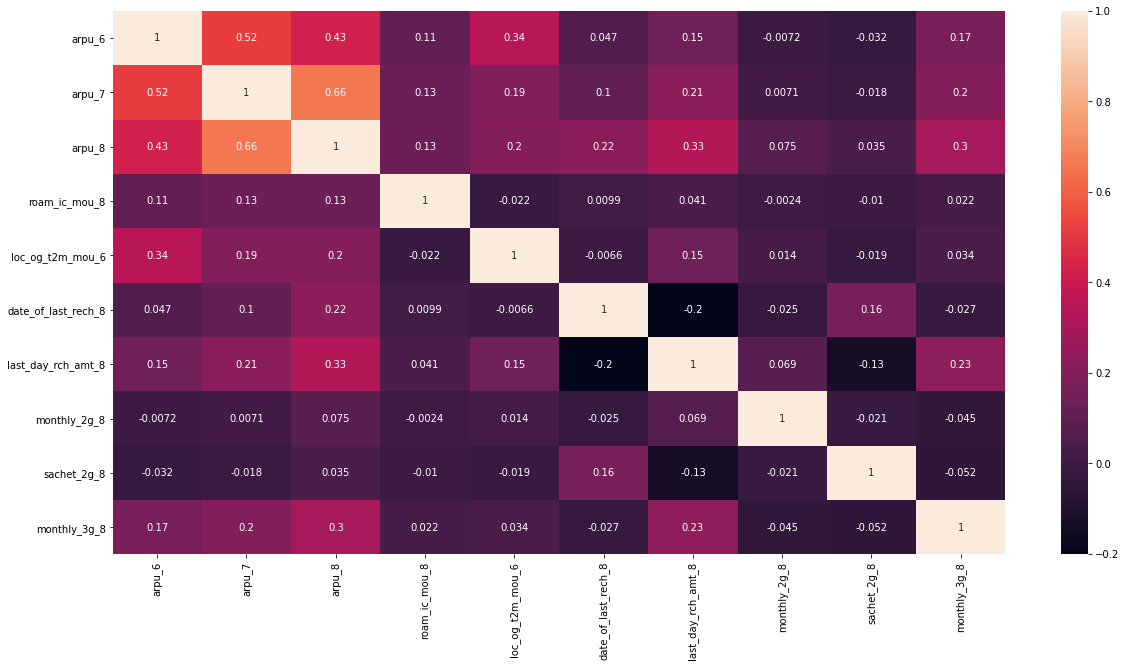

In [68]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_norm[col].corr(),annot = True)

## VIF value

In [69]:
col_for_vif = list(col)
col_for_vif.append('churn')
# telecom_df4.head()
vif_cal(input_data=telecom_df4[col_for_vif], dependent_col='churn')

,Var,Vif
1,arpu_7,7.78
2,arpu_8,6.24
0,arpu_6,5.86
5,date_of_last_rech_8,5.15
4,loc_og_t2m_mou_6,1.95
6,last_day_rch_amt_8,1.94
9,monthly_3g_8,1.26
8,sachet_2g_8,1.19
7,monthly_2g_8,1.12
3,roam_ic_mou_8,1.10


#### VIF looks good now will select these coloum for creating LogisticRegression

In [70]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(class_weight='balanced')
logsk.fit(X_train[col], y_train)

LogisticRegression(class_weight='balanced')

### ROC_AUC score

In [71]:
#Making prediction on the test data
pred_probs_test = logsk.predict_proba(X_test[col])[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.87'

In [72]:
#Making prediction on the test data
pred_test = logsk.predict_proba(X_test[col])
y_pred_default = logsk.predict(X_test[col])

In [73]:
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('accuracy_score : ',accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      5439
           1       0.31      0.81      0.44       557

    accuracy                           0.81      5996
   macro avg       0.64      0.81      0.66      5996
weighted avg       0.91      0.81      0.85      5996

[[4413 1026]
 [ 106  451]]
accuracy_score :  0.8112074716477652


In [74]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

In [75]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC Score: ',roc_auc)

ROC_AUC Score:  0.8657425607925735


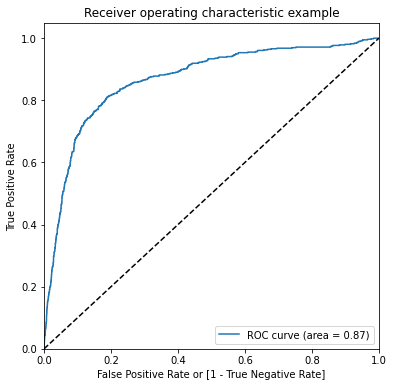

(array([0.00000000e+00, 1.83857327e-04, 1.83857327e-04, ...,
        9.99632285e-01, 9.99816143e-01, 1.00000000e+00]),
 array([0.        , 0.        , 0.00179533, ..., 1.        , 1.        ,
        1.        ]),
 array([1.99837170e+00, 9.98371696e-01, 9.95124292e-01, ...,
        1.66591919e-04, 1.56198581e-04, 9.87704442e-06]))

In [76]:
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)


In [77]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.039943,1,0,0,0,0,0,0,0,0,0
1,0,0.151932,1,1,0,0,0,0,0,0,0,0
2,0,0.334786,1,1,1,1,0,0,0,0,0,0
3,0,0.150052,1,1,0,0,0,0,0,0,0,0
4,0,0.522739,1,1,1,1,1,1,0,0,0,0


In [78]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.092895  0.000000  1.000000
0.1   0.1  0.292528  0.223019  0.971275
0.2   0.2  0.458306  0.407612  0.953321
0.3   0.3  0.601901  0.570693  0.906643
0.4   0.4  0.723316  0.709138  0.861759
0.5   0.5  0.811207  0.811362  0.809695
0.6   0.6  0.862909  0.876080  0.734291
0.7   0.7  0.890260  0.917816  0.621185
0.8   0.8  0.904603  0.954220  0.420108
0.9   0.9  0.910774  0.985475  0.181329


<AxesSubplot:xlabel='prob'>

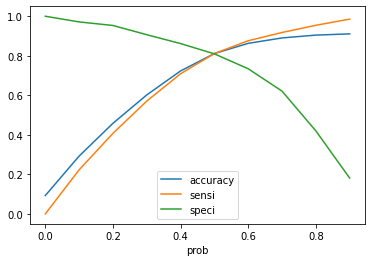

In [79]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [80]:
## Finidng the optimal cutoff
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_pred_final.churn,y_pred_final.churn_prob)
print('CutOff threshold: ', threshold)

CutOff threshold:  [0.4982475268203482]


In [81]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.49 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.49 else 0)

y_pred_final.churn.value_counts()

0    5439
1     557
Name: churn, dtype: int64

# Confusion matrix 


In [82]:
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

array([[4363, 1076],
       [ 103,  454]], dtype=int64)

In [83]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score : ',accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

Accuracy Score :  0.8112074716477652
Sensitivity:  0.8150807899461401
Specificity:  0.8021695164552307
false postive rate:  0.19783048354476926
positive predictive value:  0.29673202614379085
Negative predictive value:  0.9769368562472011


### As we can see Above LogisticRegression giving good Accuracy with PCA and with RFE

### SVM with PCA

In [85]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

#specify range of hyperparameters
#Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100,1000]}]

#specify model
model = SVC(kernel="linear", class_weight='balanced')

#set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                         param_grid = hyper_params, 
                         scoring= 'accuracy', 
                         cv = folds, 
                         verbose = 3,n_jobs=-1)

In [86]:
# # fit the model
model_cv.fit(df_train_pca,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=SVC(class_weight='balanced', kernel='linear'), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001]}],
             scoring='accuracy', verbose=3)

In [87]:
# # printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',model_cv.best_score_,'using',model_cv.best_params_)

We can get accuracy of 0.824083798899194 using {'C': 100, 'gamma': 0.01}


In [ ]:
# # upon trying rbf, poly and linear. Linear is giving the best results.
model = SVC(C=1000, gamma=0.01, kernel="linear", class_weight='balanced') 
model.fit(df_train_pca,y_train)
y_pred_default = model.predict(df_test_pca)

confusion_SVM_hyper=confusion_matrix(y_test,y_pred_default)
confusion_SVM_hyper

### DecisionTreeClassifier With PCA

In [84]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dt_default.fit(df_train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5)

In [85]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(df_test_pca)

# # Printing classification report
# print(classification_report(y_test, y_pred_default))

# from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('Acuracy Score', accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87      5439
           1       0.24      0.61      0.34       557

    accuracy                           0.78      5996
   macro avg       0.60      0.70      0.61      5996
weighted avg       0.89      0.78      0.82      5996

[[4363 1076]
 [ 220  337]]
Acuracy Score 0.7838559039359573


In [86]:
confusion_tree = confusion_matrix(y_test,y_pred_default)
TP = confusion_tree[1,1] # true positive 
TN = confusion_tree[0,0] # true negatives
FP = confusion_tree[0,1] # false positives
FN = confusion_tree[1,0] # false negatives

print('Acuracy Score', accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Acuracy Score 0.7838559039359573
Sensitivity:  0.6050269299820467
Specificity:  0.8021695164552307
false postive rate:  0.19783048354476926
positive predictive value:  0.23849964614295824
Negative predictive value:  0.9519965088370064
Misclassification Rate:  0.2161440960640427


### Hyperparameter tuning

In [91]:
########## lets tune hyper parameterss
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", class_weight='balanced', random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                    return_train_score=True)
tree.fit(df_train_pca,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy')

In [92]:
y_train.shape


(23983,)

In [93]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.086774,0.003672,0.001391,4.823302e-04,1,{'max_depth': 1},0.673129,0.548468,0.668960,0.554212,...,0.595668,0.061927,39,0.673877,0.555301,0.678046,0.553031,0.548965,0.601844,0.060565
1,0.154387,0.004234,0.001197,3.985656e-04,2,{'max_depth': 2},0.768814,0.838649,0.702314,0.845496,...,0.797527,0.054946,31,0.766027,0.848796,0.718180,0.844478,0.826653,0.800827,0.050823
2,0.231779,0.012809,0.000999,1.368780e-06,3,{'max_depth': 3},0.744632,0.750886,0.721910,0.785029,...,0.747030,0.021453,34,0.740905,0.761701,0.733243,0.780268,0.735863,0.750396,0.017976
3,0.293821,0.007643,0.001196,3.996037e-04,4,{'max_depth': 4},0.808213,0.682301,0.712946,0.718932,...,0.726263,0.042849,38,0.806630,0.697175,0.733295,0.727472,0.719862,0.736887,0.036966
4,0.358074,0.004585,0.000997,9.368364e-07,5,{'max_depth': 5},0.706692,0.756306,0.743381,0.765013,...,0.743736,0.019979,35,0.715574,0.772230,0.769415,0.774274,0.757023,0.757703,0.021900


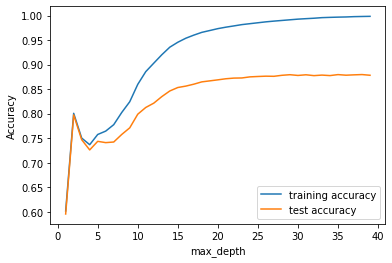

In [94]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# seems 15 or 20 Max depth

In [ ]:
## Lets tune min sample leaf
# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(df_train_pca,y_train)

In [ ]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()


In [ ]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# seems 15 or 20 Max depth

In [ ]:
## Lets tune min sample leaf
# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(df_train_pca,y_train)

In [ ]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 5 to 150

In [ ]:
## Tuning min sample split
# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced', random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(df_train_pca,y_train)

In [ ]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 25

In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(5, 200, 20),
    'min_samples_split': range(5, 200, 20),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='recall_score',
                          cv = n_folds, verbose = 1, n_jobs = -1,return_train_score=True)

# Fit the grid search to the data
grid_search.fit(df_train_pca,y_train)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

In [ ]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

In [ ]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=5,
                                  min_samples_split=5)
clf_gini.fit(df_train_pca,y_train)

In [ ]:
y_pred_default = clf_gini.predict(df_test_pca)
confusion_tree_hyper=confusion_matrix(y_test,y_pred_default)
confusion_tree_hyper

In [ ]:
TP = confusion_tree_hyper[1,1] # true positive 
TN = confusion_tree_hyper[0,0] # true negatives
FP = confusion_tree_hyper[0,1] # false positives
FN = confusion_tree_hyper[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

### RandomForestClassifier with PCA

In [95]:
# Random forest

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

# fit
rfc.fit(df_train_pca,y_train)

# Making predictions
y_pred_default = rfc.predict(df_test_pca)

In [96]:
confusion_rf=confusion_matrix(y_test,y_pred_default)
confusion_rf

array([[5415,   24],
       [ 515,   42]], dtype=int64)

In [97]:
TN = confusion_rf[0,0] # true positive 
TP = confusion_rf[1,1] # true negatives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.07540394973070018
Specificity:  0.9955874241588527
false postive rate:  0.00441257584114727
positive predictive value:  0.6363636363636364
Negative predictive value:  0.9131534569983136
Misclassification Rate:  0.08989326217478319


### Hyperparameter tuning for RandomForest

In [ ]:
#Lets do some hyper parameter tuning 
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf_with_pca = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf_with_pca = GridSearchCV(rf_with_pca, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1, return_train_score=True)
rf_with_pca.fit(df_train_pca, y_train)

In [ ]:
# scores of GridSearch CV
scores = rf_with_pca.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 10 to 12

In [ ]:
# Tuning n_estimators
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1)
rf.fit(df_train_pca, y_train)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=10,class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1)
rf.fit(df_train_pca, y_train)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 8 to 10

In [ ]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1)
rf.fit(df_train_pca, y_train)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 100 to 150

In [ ]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(df_train_pca, y_train)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 200 to 300

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10],
    'min_samples_leaf': range(100, 200, 100),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': range(200, 400, 100), 
    'max_features': [8, 10, 12]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 5, n_jobs=-1, verbose = 1)

In [ ]:
# Fit the grid search to the data
grid_search.fit(df_train_pca, y_train)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

In [ ]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=8,
                             n_estimators=300)

In [ ]:
# fit
rfc.fit(df_train_pca,y_train)

In [ ]:
# predict
y_pred_default = rfc.predict(df_test_pca)

In [ ]:
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('accuracy_score:  ',accuracy_score(y_test,y_pred_default))

In [ ]:
# Confusion Matrix
confusion_rf_hyper=confusion_matrix(y_test,y_pred_default)
confusion_rf_hyper

In [ ]:
TN = confusion_rf_hyper[0,0] # true positive 
TP = confusion_rf_hyper[1,1] # true negatives
FP = confusion_rf_hyper[0,1] # false positives
FN = confusion_rf_hyper[1,0] # false negatives

print('Accuracy Score:  ',accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

### Recomendation for Model Selection
##### Logistic Regression and Random Forest performed better than Decision Tree for customer churn analysis for this particular dataset, using PCA.
##### LogisticRegression is the best model 80.9% Sensitivity
##### Accuracy of RandomForest is highest with 85%

### LogisticRegression
    Accuracy Score : 0.81 (With PCA on Test)   
    Sensitivity: 0.80 (with PCA)

    Accuracy Score : 0.81(With RFE on Test)

    Sensitivity: 0.81(with RFE)

### RandomForest
    Accuracy Score: 0.85
    Sensitivity: 0.67

### DecisionTree
    Sensitivity: 0.62 (with PCA)

### RandomForest on all feature

In [ ]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

In [ ]:
# fit
rfc.fit(X_train,y_train)

In [ ]:
# Making predictions
predictions = rfc.predict(X_test)

In [ ]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

In [ ]:
# Confusion Matrix
confusion_rf_with_all_feature=confusion_matrix(y_test,predictions)
confusion_rf_with_all_feature

In [ ]:
TN = confusion_rf_with_all_feature[0,0] # true positive 
TP = confusion_rf_with_all_feature[1,1] # true negatives
FP = confusion_rf_with_all_feature[0,1] # false positives
FN = confusion_rf_with_all_feature[1,0] # false negatives

print('Accuracy Score: ', accuracy_score(y_test,predictions))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

### Hyperparameter Tuning

In [ ]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1)

In [ ]:
rf.fit(X_train, y_train)


In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#10,12

In [ ]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1000, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1)
rf.fit(X_train, y_train)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(100, 700, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10,12],
    'min_samples_leaf': range(150, 250, 50),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': [300,400,500], 
    'max_features': [15, 20]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 3, verbose = 1, n_jobs=-1)

In [ ]:
# fit
grid_search.fit(X_train,y_train)


In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

In [98]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc_final = RandomForestClassifier(bootstrap=True,class_weight='balanced',
                             max_depth=10,
                             min_samples_leaf=150, 
                             min_samples_split=300,
                             max_features=15,
                             n_estimators=500)

In [99]:
# fit
rfc_final.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=15,
                       min_samples_leaf=150, min_samples_split=300,
                       n_estimators=500)

In [100]:
# predict
predictions = rfc_final.predict(X_test)

In [101]:
from sklearn import metrics
confusion_rm_f = metrics.confusion_matrix( y_test, predictions )
confusion_rm_f

array([[4767,  672],
       [ 100,  457]], dtype=int64)

In [102]:
TN = confusion_rm_f[0,0] # true positive 
TP = confusion_rm_f[1,1] # true negatives
FP = confusion_rm_f[0,1] # false positives
FN = confusion_rm_f[1,0] # false negatives

print('Accuracy Score: ',accuracy_score(y_test,predictions))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score:  0.8712474983322215
Sensitivity:  0.8204667863554758
Specificity:  0.8764478764478765
false postive rate:  0.12355212355212356
positive predictive value:  0.40478299379982285
Negative predictive value:  0.9794534620916375
Misclassification Rate:  0.12875250166777852


In [103]:
#Important Variables
from collections import OrderedDict
feature_names=list(X_train.columns.values)
important_features_dict = {}
for name, importance in zip(feature_names, rfc_final.feature_importances_):
    important_features_dict[name]=importance
#Sorting Dictionary in descending order of the importance variable
d_descending = OrderedDict(sorted(important_features_dict.items(), 
                                  key=lambda kv: kv[1], reverse=True))

In [104]:
telecom_df5.columns


Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'offnet_mou_6', 'offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6',
       'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'isd_og_mou_6', 'spl_og_mou_6', 'spl_og_mou_7',
       'spl_og_mou_8', 'og_others_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7',
       'std_ic_t2f_mou_8', 'isd_ic_mou_6', 'ic_others_6', 'ic_others_7',
       'ic_others_8', 'total_rech_num_6', 'total_rech_num_7', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'date_of_last_rech_6',
       'date_of_last_rech_7', 'date_of_last_rech_8', 'last_day_rch_amt_6',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'monthly_2g_6',
       'mont

In [105]:
#Variable Importance top 30 variable
dic= dict(d_descending)

from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

n=12
n_items = take(n, dic.items())

In [106]:
print('These are top 12 driver variable: ',n_items)


These are top 12 driver variable:  [('arpu_8', 0.25225299859120254), ('last_day_rch_amt_8', 0.17834894984261493), ('roam_ic_mou_8', 0.13489021059945108), ('max_rech_amt_8', 0.12055264917261804), ('date_of_last_rech_8', 0.08025576028163248), ('spl_og_mou_8', 0.038578003852458985), ('std_ic_t2f_mou_8', 0.022881534371079353), ('loc_og_t2f_mou_6', 0.012700084917453136), ('loc_ic_t2f_mou_6', 0.012664266425117417), ('ic_others_8', 0.011696628407522664), ('arpu_7', 0.011567095871283484), ('roam_ic_mou_7', 0.011530409943176907)]


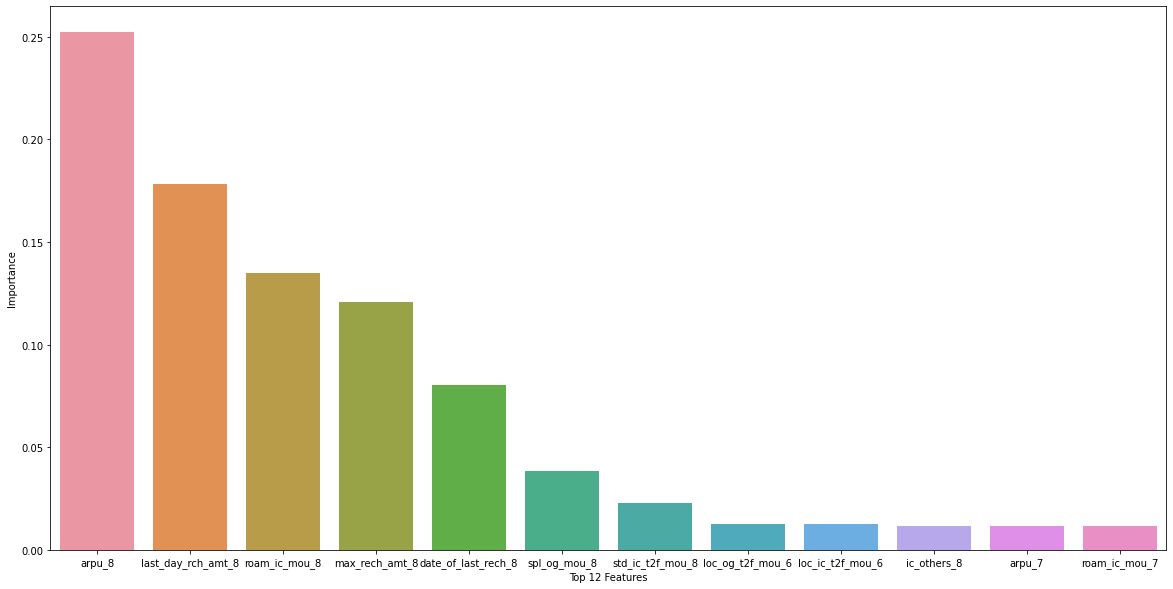

In [107]:
imp=rfc_final.feature_importances_
names=X_train.columns.values
imp,names=zip(*sorted(zip(imp,names)))

df_1=pd.DataFrame({"Variable":names,"importance":imp})
df_2 = df_1.sort_values(by="importance",axis=0,ascending=False)
df_2 = df_2.reset_index(drop=True)


plt.figure(figsize=(20, 10))

ax = sns.barplot(x='Variable', y= 'importance', data=df_2[0:12])
ax.set(xlabel = 'Top 12 Features', ylabel = 'Importance')
plt.show()

<ipython-input-108-ba6b3e56bf26>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sample = telecom_df2.groupby(['churn'])['arpu_6', 'arpu_7', 'arpu_8'].median()


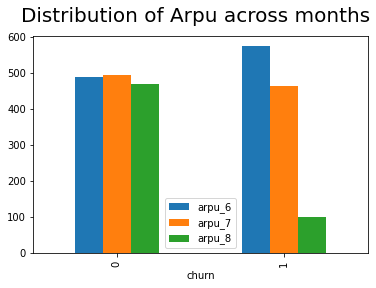

<ipython-input-108-ba6b3e56bf26>:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sample = telecom_df2.groupby(['churn'])['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8'].mean()


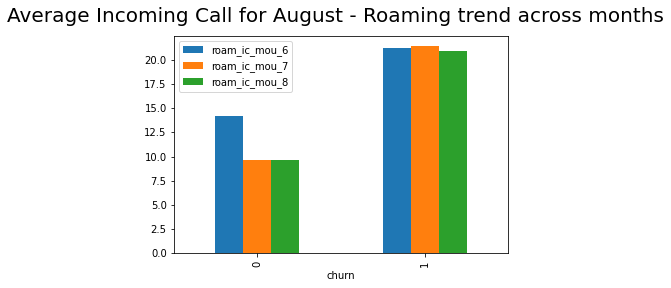

<ipython-input-108-ba6b3e56bf26>:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sample = telecom_df2.groupby(['churn'])['max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8'].mean()


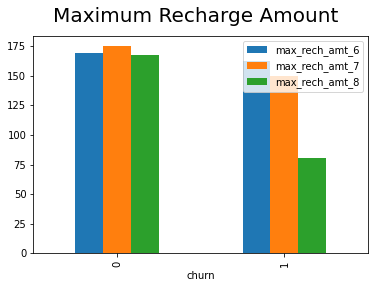

<ipython-input-108-ba6b3e56bf26>:18: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sample = telecom_df2.groupby(['churn'])['spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8'].median()


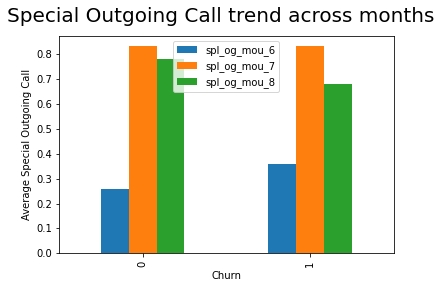

<ipython-input-108-ba6b3e56bf26>:26: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sample = telecom_df2.groupby(['churn'])['std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8'].mean()


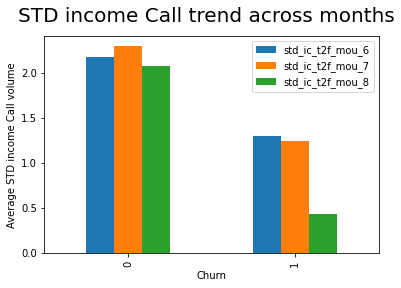

<ipython-input-108-ba6b3e56bf26>:34: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sample = telecom_df2.groupby(['churn'])['loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8'].mean()


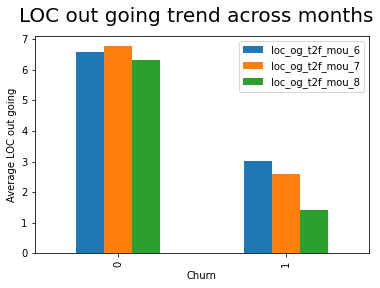

<ipython-input-108-ba6b3e56bf26>:41: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sample = telecom_df2.groupby(['churn'])['loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8'].mean()


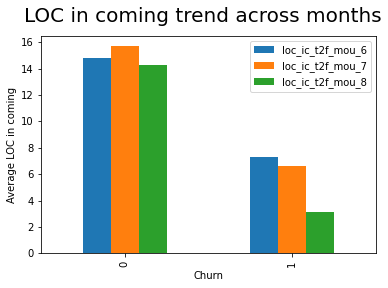

<ipython-input-108-ba6b3e56bf26>:48: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sample = telecom_df2.groupby(['churn'])['ic_others_6', 'ic_others_7', 'ic_others_8'].mean()


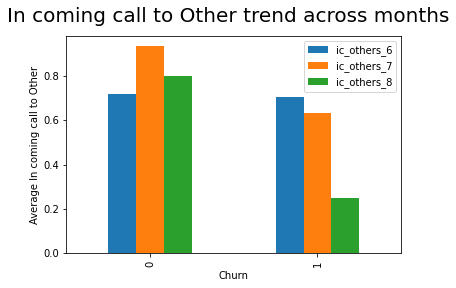

<ipython-input-108-ba6b3e56bf26>:56: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sample = telecom_df2.groupby(['churn'])['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8'].median()


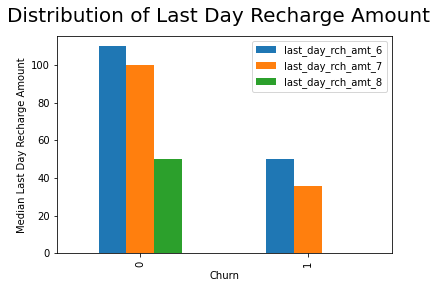

In [108]:
telecom_df2['churn'] = telecom_df2['churn'].astype('object', copy = False)
df_sample = telecom_df2.groupby(['churn'])['arpu_6', 'arpu_7', 'arpu_8'].median()
df_sample.plot.bar()
plt.suptitle('Distribution of Arpu across months', fontsize=20)
plt.show()

df_sample = telecom_df2.groupby(['churn'])['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8'].mean()
df_sample.plot.bar()
plt.suptitle('Average Incoming Call for August - Roaming trend across months', fontsize=20)
plt.show()

df_sample = telecom_df2.groupby(['churn'])['max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8'].mean()
df_sample.plot.bar()
plt.suptitle('Maximum Recharge Amount', fontsize=20)
plt.show()


df_sample = telecom_df2.groupby(['churn'])['spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8'].median()
df_sample.plot.bar()
plt.suptitle('Special Outgoing Call trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average Special Outgoing Call")
plt.show()


df_sample = telecom_df2.groupby(['churn'])['std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8'].mean()
df_sample.plot.bar()
plt.suptitle('STD income Call trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average STD income Call volume")
plt.show()


df_sample = telecom_df2.groupby(['churn'])['loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8'].mean()
df_sample.plot.bar()
plt.suptitle('LOC out going trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average LOC out going")
plt.show()

df_sample = telecom_df2.groupby(['churn'])['loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8'].mean()
df_sample.plot.bar()
plt.suptitle('LOC in coming trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average LOC in coming")
plt.show()

df_sample = telecom_df2.groupby(['churn'])['ic_others_6', 'ic_others_7', 'ic_others_8'].mean()
df_sample.plot.bar()
plt.suptitle('In coming call to Other trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average In coming call to Other")
plt.show()

telecom_df2['churn'] = telecom_df2['churn'].astype('object', copy = False)
df_sample = telecom_df2.groupby(['churn'])['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8'].median()
df_sample.plot.bar()
plt.suptitle('Distribution of Last Day Recharge Amount', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Median Last Day Recharge Amount")
plt.show()

<AxesSubplot:xlabel='date_of_last_rech_8', ylabel='churn'>

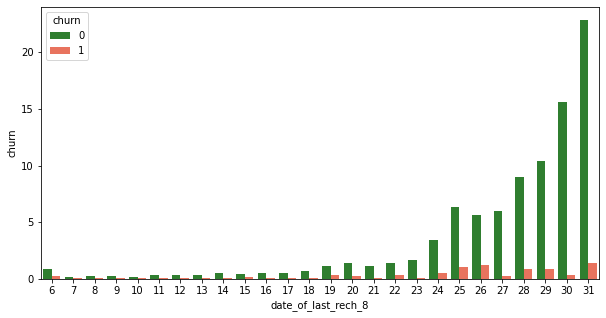

In [109]:
plt.figure(figsize=(10,5))
palette = ["#228B22", "#FF6347"]
sns.barplot(x="date_of_last_rech_8", y="churn", hue="churn", data=telecom_df4, palette=palette, 
            estimator=lambda x: len(x) / len(telecom_df4) * 100)

### Driver Variables of Churn and Churn Analysis & Recommendation
ARPU 7th and 8th - Average Revenue Per User decreases from 6th to 7th month to 8th month as most of the users are churned by 8th month.

date_of_last_rech_8 - Most of the Users are churned between 25th to 31st of the month. Hence providing offers prior to 25th can reduce the churn. Send out periodic offers to customers between 15th of the month to 25th of the month.

last_day_rch_amt_8 - Lower the last day recharge amount higher the churn rate. Focus on customers whos last day recharge amount has decrased. Specialy for customers without any recharge amount.

roam_ic_mou_8 - Higher the incoming roaming amount, higher is the churn rate. Focus on customers whose incoming roaming amount has increased, because they are likely to churn.

std_ic_t2f_mou_8 - Lower the STD incoming call, higher is the churn rate. Focus on customers whose STD incoming call amount has decreased for that month.

max_rech_amt_8- Focus on the customer whoes Avg max recharge amount has been decreased